In [1]:
import numpy as np # Mathematical Calculations
import pandas as pd # Data operations and summaries
import seaborn as sns # Good data visualizations
import matplotlib.pyplot as plt # basic Visualizations
import statsmodels.api as sm # Statistical Models
import warnings
warnings.simplefilter(action='ignore')
from scipy import stats

In [2]:
data = pd.read_csv("elpa.csv")

# Preliminary Checks

In [3]:
len(data) # Number of Rows in the data

1941

In [4]:
data.shape # Number of rows and columns

(1941, 34)

In [5]:
data.head(10)# Extract the top n observations from the data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V25,V26,V27,V28,V29,V30,V31,V32,V33,Class
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.8182,-0.2913,0.5822,1,0,0,0,0,0,1
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.7931,-0.1756,0.2984,1,0,0,0,0,0,1
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.6667,-0.1228,0.2150,1,0,0,0,0,0,1
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.8444,-0.1568,0.5212,1,0,0,0,0,0,1
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9338,-0.1992,1.0000,1,0,0,0,0,0,1
5,430,441,100250,100337,630,20,87,62357,64,127,...,0.8736,-0.2267,0.9874,1,0,0,0,0,0,1
6,413,446,138468,138883,9052,230,432,1481991,23,199,...,0.9205,0.2791,1.0000,1,0,0,0,0,0,1
7,190,200,210936,210956,132,11,20,20007,124,172,...,0.5000,0.1841,0.3359,1,0,0,0,0,0,1
8,330,343,429227,429253,264,15,26,29748,53,148,...,0.5000,-0.1197,0.5593,1,0,0,0,0,0,1
9,74,90,779144,779308,1506,46,167,180215,53,143,...,0.9024,-0.0651,1.0000,1,0,0,0,0,0,1


In [7]:
data.tail(10) # Extracts the last n observations

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V25,V26,V27,V28,V29,V30,V31,V32,V33,Class
1931,523,567,266325,266337,209,67,30,26833,119,141,...,-0.7273,0.0030,0.8183,0,0,0,0,0,0,2
1932,239,269,276029,276047,299,51,22,37820,116,140,...,-0.4000,-0.0118,0.8299,0,0,0,0,0,0,2
1933,367,422,289647,289665,355,116,58,46882,123,143,...,-0.6727,0.0317,0.9899,0,0,0,0,0,0,2
1934,137,170,301492,301511,304,59,26,35778,111,126,...,-0.4242,-0.0805,0.8971,0,0,0,0,0,0,2
1935,238,287,315114,315142,671,91,39,86424,119,143,...,-0.4286,0.0062,0.9992,0,0,0,0,0,0,2
1936,249,277,325780,325796,273,54,22,35033,119,141,...,-0.4286,0.0026,0.7254,0,0,0,0,0,0,2
1937,144,175,340581,340598,287,44,24,34599,112,133,...,-0.4516,-0.0582,0.8173,0,0,0,0,0,0,2
1938,145,174,386779,386794,292,40,22,37572,120,140,...,-0.4828,0.0052,0.7079,0,0,0,0,0,0,2
1939,137,170,422497,422528,419,97,47,52715,117,140,...,-0.0606,-0.0171,0.9919,0,0,0,0,0,0,2
1940,1261,1281,87951,87967,103,26,22,11682,101,133,...,-0.2000,-0.1139,0.5296,0,0,0,0,0,0,2


In [8]:
data.sample(10) # Randomly checking some observations in the middle

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V25,V26,V27,V28,V29,V30,V31,V32,V33,Class
439,39,214,1242405,1242592,15414,796,478,1798470,24,142,...,0.0642,-0.0885,1.0000,0,0,1,0,0,0,1
292,69,81,2001776,2001794,119,20,18,11516,84,117,...,0.3333,-0.2440,0.3601,0,1,0,0,0,0,1
1666,1043,1106,4163671,4163699,980,80,46,92750,24,133,...,-0.5556,-0.2606,0.9999,0,0,0,0,0,0,2
1096,362,388,2839568,2839625,1015,49,59,105560,76,132,...,0.5439,-0.1875,0.9996,0,0,0,0,0,1,1
1769,864,893,707122,707137,238,56,31,30361,118,140,...,-0.4828,-0.0034,0.7079,0,0,0,0,0,0,2
1672,317,337,5082496,5082524,206,27,28,22484,95,127,...,0.2857,-0.1473,0.8479,0,0,0,0,0,0,2
569,41,190,508837,508896,5702,216,119,591835,45,126,...,-0.6040,-0.1891,1.0000,0,0,1,0,0,0,1
1176,1077,1090,699354,699365,114,15,11,11778,71,132,...,-0.1539,-0.1928,0.2570,0,0,0,0,0,1,1
797,689,696,1481144,1481148,16,7,4,1961,102,141,...,-0.4286,-0.0425,0.1384,0,0,0,1,0,0,1
1078,771,778,1264388,1264403,84,9,15,9968,107,133,...,0.5333,-0.0729,0.2116,0,0,0,0,0,1,1


In [9]:
data.sample(frac = 0.01)# Extract randomly some defined percentage of observations

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V25,V26,V27,V28,V29,V30,V31,V32,V33,Class
1913,273,298,473262,473272,94,30,18,11877,117,143,...,-0.6000,-0.0129,0.4138,0,0,0,0,0,0,2
1758,92,115,2797518,2797525,77,25,10,6702,76,101,...,-0.6956,-0.3200,0.2806,0,0,0,0,0,0,2
85,921,930,638468,638484,114,14,17,13173,94,140,...,0.4375,-0.0972,0.2583,1,0,0,0,0,0,1
1832,1244,1251,81220,81232,42,12,15,7658,175,190,...,0.4167,0.4245,0.1892,0,0,0,0,0,0,2
1505,325,385,508368,508656,6102,251,303,655912,87,133,...,0.7917,-0.1602,1.0000,0,0,0,0,0,0,2
1688,49,82,313092,313218,2822,102,127,275539,79,124,...,0.7381,-0.2372,1.0000,0,0,0,0,0,0,2
984,487,497,4186980,4186988,52,20,8,6999,130,141,...,-0.2000,0.0515,0.1852,0,0,0,0,0,1,1
267,195,209,1671098,1671110,99,16,13,12056,111,132,...,-0.1429,-0.0486,0.2901,0,1,0,0,0,0,1
1136,818,829,657566,657580,112,13,14,12587,86,133,...,0.2143,-0.1220,0.2712,0,0,0,0,0,1,1
300,22,31,2097257,2097270,60,15,13,5573,81,103,...,0.3077,-0.2743,0.2253,0,1,0,0,0,0,1


In [13]:
data.iloc[[590,357,446]]# Try to get the entire details of a selected row

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V25,V26,V27,V28,V29,V30,V31,V32,V33,Class
590,100,175,909876,909953,1923,227,139,241083,116,140,...,0.0260,-0.0206,1.0000,0,0,1,0,0,0,1
357,732,750,177076,177087,136,18,11,27180,192,207,...,-0.3889,0.5613,0.3329,0,0,1,0,0,0,1
446,41,212,1309877,1310041,11271,664,396,1297285,27,141,...,-0.0409,-0.1008,1.0000,0,0,1,0,0,0,1


In [14]:
data.columns # Display the names of the columns
# Advisable to change the names of the columns especially when there is no clarity in the names or when there are spaces in the names

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31',
       'V32', 'V33', 'Class'],
      dtype='object')

In [15]:
data.sort_values(by="V21", ascending=False).head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V25,V26,V27,V28,V29,V30,V31,V32,V33,Class
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.8182,-0.2913,0.5822,1,0,0,0,0,0,1
1135,1214,1227,365205,365227,210,20,22,21547,70,127,...,0.4091,-0.1984,0.4729,0,0,0,0,0,1,1
1146,1348,1360,662867,662880,106,16,14,10152,73,124,...,0.0769,-0.2518,0.2739,0,0,0,0,0,1,1
1145,1539,1556,625496,625516,260,24,20,21865,52,110,...,0.1500,-0.3430,0.5626,0,0,0,0,0,1,1
1143,181,191,398801,398815,112,15,14,11998,87,126,...,0.2857,-0.1631,0.2532,0,0,0,0,0,1,1


In [16]:
data.sort_values(by=["V7", "V8"], ascending=[False, True]).head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V25,V26,V27,V28,V29,V30,V31,V32,V33,Class
391,19,169,4197607,4215748,152655,10449,18152,11591414,0,156,...,0.9917,-0.4068,1.0,0,0,1,0,0,0,1
1592,15,149,2278497,2278909,37334,908,903,3918209,19,134,...,0.6748,-0.1801,1.0,0,0,0,0,0,0,2
396,0,224,418600,418798,20894,1169,712,2529140,18,143,...,-0.1161,-0.0543,1.0,0,0,1,0,0,0,1
397,0,828,468317,468520,20726,1193,709,2499819,25,143,...,-0.7548,-0.0577,1.0,0,0,1,0,0,0,1
405,37,261,652969,653195,18517,1021,696,2230510,25,150,...,0.0088,-0.0589,1.0,0,0,1,0,0,0,1


In [19]:
data[(data["Class"] == 1) | (data["V33"] == "0")]["V8"].max() #

11591414

In [20]:
data.info()# Gives information on Missing values, Data Types
# Check whether any of the columns differ in their data type from what is typically expected

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 34 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      1941 non-null   int64  
 1   V2      1941 non-null   int64  
 2   V3      1941 non-null   int64  
 3   V4      1941 non-null   int64  
 4   V5      1941 non-null   int64  
 5   V6      1941 non-null   int64  
 6   V7      1941 non-null   int64  
 7   V8      1941 non-null   int64  
 8   V9      1941 non-null   int64  
 9   V10     1941 non-null   int64  
 10  V11     1941 non-null   int64  
 11  V12     1941 non-null   int64  
 12  V13     1941 non-null   int64  
 13  V14     1941 non-null   int64  
 14  V15     1941 non-null   float64
 15  V16     1941 non-null   float64
 16  V17     1941 non-null   float64
 17  V18     1941 non-null   float64
 18  V19     1941 non-null   float64
 19  V20     1941 non-null   float64
 20  V21     1941 non-null   float64
 21  V22     1941 non-null   float64
 22  

In [38]:
data["V28"] = data["V28"].astype("object") # CHange the data type of the object
data["V29"] = data["V29"].astype("object")
data["V30"] = data["V30"].astype("object")
data["V31"] = data["V31"].astype("object")
data["V32"] = data["V32"].astype("object")
data["V33"] = data["V33"].astype("object")
data["V12"] = data["V12"].astype("object")
data["V13"] = data["V13"].astype("object")
data["V21"] = data["V21"].astype("object")

In [39]:
data.describe()# Descriptive Statistics of the columns (Numerical columns)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V18,V19,V20,V22,V23,V24,V25,V26,V27,Class
count,1941.000000,1941.000000,1.941000e+03,1.941000e+03,1941.000000,1941.000000,1941.000000,1.941000e+03,1941.000000,1941.000000,...,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000
mean,571.136012,617.964451,1.650685e+06,1.650739e+06,1893.878413,111.855229,82.965997,2.063121e+05,84.548686,130.193715,...,0.033361,0.610529,0.813472,2.492388,1.335686,1.403271,0.083288,-0.131305,0.585420,1.346728
std,520.690671,497.627410,1.774578e+06,1.774590e+06,5168.459560,301.209187,426.482879,5.122936e+05,32.134276,18.690992,...,0.058961,0.243277,0.234274,0.788930,0.481612,0.454345,0.500868,0.148767,0.339452,0.476051
min,0.000000,4.000000,6.712000e+03,6.724000e+03,2.000000,2.000000,1.000000,2.500000e+02,0.000000,37.000000,...,0.001500,0.014400,0.048400,0.301000,0.301000,0.000000,-0.991000,-0.998900,0.119000,1.000000
25%,51.000000,192.000000,4.712530e+05,4.712810e+05,84.000000,15.000000,13.000000,9.522000e+03,63.000000,124.000000,...,0.006600,0.411800,0.596800,1.924300,1.000000,1.079200,-0.333300,-0.195000,0.248200,1.000000
50%,435.000000,467.000000,1.204128e+06,1.204136e+06,174.000000,26.000000,25.000000,1.920200e+04,90.000000,127.000000,...,0.010100,0.636400,0.947400,2.240600,1.176100,1.322200,0.095200,-0.133000,0.506300,1.000000
75%,1053.000000,1072.000000,2.183073e+06,2.183084e+06,822.000000,84.000000,83.000000,8.301100e+04,106.000000,140.000000,...,0.023500,0.800000,1.000000,2.914900,1.518500,1.732400,0.511600,-0.066600,0.999800,2.000000
max,1705.000000,1713.000000,1.298766e+07,1.298769e+07,152655.000000,10449.000000,18152.000000,1.159141e+07,203.000000,253.000000,...,0.875900,1.000000,1.000000,5.183700,3.074100,4.258700,0.991700,0.642100,1.000000,2.000000


In [40]:
data.describe(include=['O']) # Basic summary of categorical columns

,V12,V13,V21,V28,V29,V30,V31,V32,V33
count,1941,1941,1941.0,1941,1941,1941,1941,1941,1941
unique,2,2,3.0,2,2,2,2,2,2
top,0,1,1.0,0,0,0,0,0,0
freq,1164,1164,1072.0,1783,1751,1550,1869,1886,1539


In [41]:
data.nunique() # Unique number of values in each column

V1        962
V2        994
V3       1939
V4       1940
V5        920
V6        399
V7        317
V8       1909
V9        161
V10       100
V11        84
V12         2
V13         2
V14        24
V15      1387
V16      1338
V17       770
V18       454
V19       818
V20       648
V21         3
V22       914
V23       183
V24       217
V25       918
V26      1522
V27       388
V28         2
V29         2
V30         2
V31         2
V32         2
V33         2
Class       2
dtype: int64

In [42]:
data.apply(np.max)

V1       1.705000e+03
V2       1.713000e+03
V3       1.298766e+07
V4       1.298769e+07
V5       1.526550e+05
V6       1.044900e+04
V7       1.815200e+04
V8       1.159141e+07
V9       2.030000e+02
V10      2.530000e+02
V11      1.794000e+03
V12      1.000000e+00
V13      1.000000e+00
V14      3.000000e+02
V15      9.952000e-01
V16      9.439000e-01
V17      1.000000e+00
V18      8.759000e-01
V19      1.000000e+00
V20      1.000000e+00
V21      1.000000e+00
V22      5.183700e+00
V23      3.074100e+00
V24      4.258700e+00
V25      9.917000e-01
V26      6.421000e-01
V27      1.000000e+00
V28      1.000000e+00
V29      1.000000e+00
V30      1.000000e+00
V31      1.000000e+00
V32      1.000000e+00
V33      1.000000e+00
Class    2.000000e+00
dtype: float64

In [43]:
data.skew()#symmetricity of the data

V1        0.500897
V2        0.524210
V3        2.811213
V4        2.811169
V5       14.083822
V6       21.539451
V7       39.293158
V8        7.730720
V9       -0.107098
V10       1.287035
V11       0.851422
V12       0.407249
V13      -0.407249
V14       2.206935
V15       0.685771
V16       0.293468
V17      -0.056306
V18       5.181830
V19      -0.235096
V20      -0.928582
V21      -0.306422
V22       0.748284
V23       1.001014
V24       0.445101
V25      -0.153446
V26       0.679339
V27       0.125789
V28       3.063973
V29       2.708438
V30       1.489927
V31       4.902448
V32       5.689472
V33       1.446652
Class     0.644593
dtype: float64

In [44]:
data.kurtosis() # Peaked nature of the data ..The deviation of the data from normality

V1         -1.145143
V2         -1.077525
V3         11.357575
V4         11.357194
V5        375.838204
V6        715.956548
V7       1663.051848
V8        131.495265
V9          0.112370
V10         7.858420
V11        -1.191714
V12        -1.836041
V13        -1.836041
V14         4.937838
V15        -0.904209
V16         0.189301
V17        -1.158030
V18        46.109128
V19        -0.930259
V20        -0.563194
V21        -1.856356
V22        -0.339211
V23        -0.041448
V24         0.384077
V25        -1.044655
V26         5.806749
V27        -1.707694
V28         7.395552
V29         5.341137
V30         0.220109
V31        22.056723
V32        30.401418
V33         0.092896
Class      -1.586135
dtype: float64

In [45]:
cat_columns = data.select_dtypes(include='object').columns
num_columns = data.select_dtypes(exclude='object').columns

# Display the Frequency of each of the categories in the cateogircal columns
for var in cat_columns: 
    
    print(data[var].value_counts())

0    1164
1     777
Name: V12, dtype: int64
1    1164
0     777
Name: V13, dtype: int64
1.0    1072
0.0     778
0.5      91
Name: V21, dtype: int64
0    1783
1     158
Name: V28, dtype: int64
0    1751
1     190
Name: V29, dtype: int64
0    1550
1     391
Name: V30, dtype: int64
0    1869
1      72
Name: V31, dtype: int64
0    1886
1      55
Name: V32, dtype: int64
0    1539
1     402
Name: V33, dtype: int64


In [46]:
for var in cat_columns: 
    
    print(data[var].value_counts(normalize=True))
    print(data[[var, "Class"]].groupby(var, as_index=False).mean().sort_values(by='Class', ascending=False))

0    0.599691
1    0.400309
Name: V12, dtype: float64
   V12     Class
0    0  1.349656
1    1  1.342342
1    0.599691
0    0.400309
Name: V13, dtype: float64
   V13     Class
1    1  1.349656
0    0  1.342342
1.0    0.552293
0.0    0.400824
0.5    0.046883
Name: V21, dtype: float64
   V21     Class
2  1.0  1.362873
1  0.5  1.340659
0  0.0  1.325193
0    0.918599
1    0.081401
Name: V28, dtype: float64
   V28     Class
0    0  1.377454
1    1  1.000000
0    0.902112
1    0.097888
Name: V29, dtype: float64
   V29     Class
0    0  1.384352
1    1  1.000000
0    0.798557
1    0.201443
Name: V30, dtype: float64
   V30     Class
0    0  1.434194
1    1  1.000000
0    0.962906
1    0.037094
Name: V31, dtype: float64
   V31     Class
0    0  1.360086
1    1  1.000000
0    0.971664
1    0.028336
Name: V32, dtype: float64
   V32    Class
0    0  1.35684
1    1  1.00000
0    0.79289
1    0.20711
Name: V33, dtype: float64
   V33     Class
0    0  1.437297
1    1  1.000000


In [47]:
cat_columns

Index(['V12', 'V13', 'V21', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33'], dtype='object')

In [48]:
for var in num_columns: 
    
    print("The descriptive statistics for ",var, " are ",stats.describe(data[var]))
    

The descriptive statistics for  V1  are  DescribeResult(nobs=1941, minmax=(0, 1705), mean=571.1360123647604, variance=271118.77530553384, skewness=0.5005100282985078, kurtosis=-1.1452853052398286)
The descriptive statistics for  V2  are  DescribeResult(nobs=1941, minmax=(4, 1713), mean=617.9644513137558, variance=247633.03945728898, skewness=0.5238044759500775, kurtosis=-1.0778413870681913)
The descriptive statistics for  V3  are  DescribeResult(nobs=1941, minmax=(6712, 12987661), mean=1650684.868109222, variance=3149128550018.589, skewness=2.8090402120335094, kurtosis=11.32524924722688)
The descriptive statistics for  V4  are  DescribeResult(nobs=1941, minmax=(6724, 12987692), mean=1650738.705306543, variance=3149169983977.7837, skewness=2.8089960252969384, kurtosis=11.324869054999867)
The descriptive statistics for  V5  are  DescribeResult(nobs=1941, minmax=(2, 152655), mean=1893.8784131890777, variance=26712974.218198717, skewness=14.07293599901044, kurtosis=374.86765589156585)
The 

In [51]:
# One categorical One numerical column - Descriptive Statistics across the categories
for var in cat_columns: 
    print(data.groupby(var).mean())

             V1          V2            V3            V4           V5  \
V12                                                                    
0    509.756014  572.436426  1.541735e+06  1.541807e+06  2888.464777   
1    663.087516  686.168597  1.813899e+06  1.813925e+06   403.918919   

             V6          V7             V8         V9         V10  ...  \
V12                                                                ...   
0    158.416667  116.113402  316628.282646  83.445017  133.496564  ...   
1     42.102960   33.308880   41050.911197  86.202059  125.245817  ...   

          V18       V19       V20       V22       V23       V24       V25  \
V12                                                                         
0    0.045149  0.575985  0.767425  2.704794  1.440702  1.518983  0.078939   
1    0.015702  0.662277  0.882454  2.174190  1.178364  1.229927  0.089803   

          V26       V27     Class  
V12                                
0   -0.100584  0.671071  1.349656

[2 rows x 25 columns]
             V1          V2            V3            V4           V5  \
V33                                                                    
0    512.260559  566.678363  1.536327e+06  1.536390e+06  2326.286550   
1    796.532338  814.305970  2.088487e+06  2.088506e+06   238.465174   

             V6         V7             V8         V9         V10  ...  \
V33                                                               ...   
0    133.432099  98.435348  253384.380117  83.256660  130.647823  ...   
1     29.251244  23.743781   26102.781095  89.495025  128.455224  ...   

          V18       V19       V20       V22       V23       V24       V25  \
V33                                                                         
0    0.038956  0.587473  0.786033  2.583688  1.384580  1.454765  0.079804   
1    0.011940  0.698795  0.918521  2.142860  1.148503  1.206135  0.096626   

          V26       V27     Class  
V33                                
0   -0.126384  

In [52]:
print("Variable ----Maximum Value ----- Maximum Value Location")
for var in num_columns: 
    print(var, "-----", data[var].max(), "-----",data[var].idxmax())    

Variable ----Maximum Value ----- Maximum Value Location
V1 ----- 1705 ----- 1527
V2 ----- 1713 ----- 1527
V3 ----- 12987661 ----- 149
V4 ----- 12987692 ----- 149
V5 ----- 152655 ----- 391
V6 ----- 10449 ----- 391
V7 ----- 18152 ----- 391
V8 ----- 11591414 ----- 391
V9 ----- 203 ----- 1395
V10 ----- 253 ----- 1458
V11 ----- 1794 ----- 1143
V14 ----- 300 ----- 1479
V15 ----- 0.9952 ----- 1629
V16 ----- 0.9439 ----- 391
V17 ----- 1.0 ----- 48
V18 ----- 0.8759 ----- 1382
V19 ----- 1.0 ----- 25
V20 ----- 1.0 ----- 0
V22 ----- 5.1837 ----- 391
V23 ----- 3.0741 ----- 1382
V24 ----- 4.2587 ----- 391
V25 ----- 0.9917 ----- 391
V26 ----- 0.6421 ----- 1395
V27 ----- 1.0 ----- 4
Class ----- 2 ----- 1268


In [53]:
from itertools import product
cat1 = data[cat_columns]
cat2 = data[cat_columns]
cat_var_prod = list(product(cat1,cat2, repeat = 1))
cat_var_prod

[('V12', 'V12'),
 ('V12', 'V13'),
 ('V12', 'V21'),
 ('V12', 'V28'),
 ('V12', 'V29'),
 ('V12', 'V30'),
 ('V12', 'V31'),
 ('V12', 'V32'),
 ('V12', 'V33'),
 ('V13', 'V12'),
 ('V13', 'V13'),
 ('V13', 'V21'),
 ('V13', 'V28'),
 ('V13', 'V29'),
 ('V13', 'V30'),
 ('V13', 'V31'),
 ('V13', 'V32'),
 ('V13', 'V33'),
 ('V21', 'V12'),
 ('V21', 'V13'),
 ('V21', 'V21'),
 ('V21', 'V28'),
 ('V21', 'V29'),
 ('V21', 'V30'),
 ('V21', 'V31'),
 ('V21', 'V32'),
 ('V21', 'V33'),
 ('V28', 'V12'),
 ('V28', 'V13'),
 ('V28', 'V21'),
 ('V28', 'V28'),
 ('V28', 'V29'),
 ('V28', 'V30'),
 ('V28', 'V31'),
 ('V28', 'V32'),
 ('V28', 'V33'),
 ('V29', 'V12'),
 ('V29', 'V13'),
 ('V29', 'V21'),
 ('V29', 'V28'),
 ('V29', 'V29'),
 ('V29', 'V30'),
 ('V29', 'V31'),
 ('V29', 'V32'),
 ('V29', 'V33'),
 ('V30', 'V12'),
 ('V30', 'V13'),
 ('V30', 'V21'),
 ('V30', 'V28'),
 ('V30', 'V29'),
 ('V30', 'V30'),
 ('V30', 'V31'),
 ('V30', 'V32'),
 ('V30', 'V33'),
 ('V31', 'V12'),
 ('V31', 'V13'),
 ('V31', 'V21'),
 ('V31', 'V28'),
 ('V31', 'V29'

In [41]:
# Cross Tabulations of the categorical variables
for var1 in cat_columns:
    for var2 in cat_columns:
        print(pd.crosstab(heart[var1], heart[var2], normalize=True))


Sex         F         M
Sex                    
F    0.210469  0.000000
M    0.000000  0.789531
ChestPainType       ASY       ATA       NAP        TA
Sex                                                  
F              0.076336  0.065431  0.057797  0.010905
M              0.464558  0.123228  0.162486  0.039258
Fasting_Blood_Sugar         0         1
Sex                                    
F                    0.182116  0.028353
M                    0.584515  0.205016
RestingECG       LVH    Normal        ST
Sex                                     
F           0.051254  0.128680  0.030534
M           0.153762  0.472192  0.163577
ExerciseAngina         N         Y
Sex                               
F               0.163577  0.046892
M               0.431843  0.357688
ST_Slope      Down      Flat        Up
Sex                                   
F         0.007634  0.081788  0.121047
M         0.061069  0.418757  0.309706
Target         0         1
Sex                       
F       0.1559

In [55]:
import scipy.stats as ss
result = []
for i in cat_var_prod:
    if i[0] != i[1]:
        result.append((i[0],i[1],list(ss.chi2_contingency(pd.crosstab(
                            data[i[0]], data[i[1]])))[1]))
result
chi_test_output = pd.DataFrame(result, columns = ["var1", "var2", "coef"])
chi_test_output

,var1,var2,coef
0,V12,V13,0.000000e+00
1,V12,V21,3.378615e-03
2,V12,V28,1.984666e-02
3,V12,V29,4.526081e-50
4,V12,V30,1.067697e-71
...,...,...,...
67,V33,V28,4.099646e-11
68,V33,V29,2.425614e-13
69,V33,V30,2.614516e-29
70,V33,V31,1.943688e-05


In [56]:
# Correlation between two numerical variables
data.corr()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V18,V19,V20,V22,V23,V24,V25,V26,V27,Class
V1,1.000000,0.988314,0.041821,0.041807,-0.307322,-0.258937,-0.118757,-0.339045,0.237637,-0.075554,...,-0.361160,0.154778,0.367907,-0.428553,-0.437944,-0.326851,0.178585,-0.031578,-0.355251,0.164804
V2,0.988314,1.000000,0.052147,0.052135,-0.225399,-0.186326,-0.090138,-0.247052,0.168649,-0.062392,...,-0.214930,0.149259,0.271915,-0.332169,-0.324012,-0.265990,0.115019,-0.038996,-0.286736,0.145783
V3,0.041821,0.052147,1.000000,1.000000,0.017670,0.023843,0.024150,0.007362,-0.065703,-0.067785,...,0.054165,0.066085,-0.036543,0.044952,0.070406,-0.008442,-0.086497,-0.090654,0.025257,-0.084415
V4,0.041807,0.052135,1.000000,1.000000,0.017840,0.024038,0.024380,0.007499,-0.065733,-0.067776,...,0.054185,0.066051,-0.036549,0.044994,0.070432,-0.008382,-0.086480,-0.090666,0.025284,-0.084422
V5,-0.307322,-0.225399,0.017670,0.017840,1.000000,0.966644,0.827199,0.978952,-0.497204,0.110063,...,0.588606,-0.294673,-0.463571,0.650234,0.603072,0.578342,-0.137604,-0.043449,0.422947,-0.184632
V6,-0.258937,-0.186326,0.023843,0.024038,0.966644,1.000000,0.912436,0.912956,-0.400427,0.111363,...,0.517098,-0.293039,-0.412100,0.563036,0.524716,0.523472,-0.101731,-0.032617,0.380605,-0.142903
V7,-0.118757,-0.090138,0.024150,0.024380,0.827199,0.912436,1.000000,0.704876,-0.213758,0.061809,...,0.209160,-0.195162,-0.136723,0.294040,0.228485,0.344378,0.031381,-0.047778,0.191772,-0.066801
V8,-0.339045,-0.247052,0.007362,0.007499,0.978952,0.912956,0.704876,1.000000,-0.540566,0.136515,...,0.658339,-0.327728,-0.529745,0.712128,0.667736,0.618795,-0.158483,-0.014067,0.464248,-0.205890
V9,0.237637,0.168649,-0.065703,-0.065733,-0.497204,-0.400427,-0.213758,-0.540566,1.000000,0.429605,...,-0.487574,0.252256,0.316610,-0.678762,-0.567655,-0.588208,0.057123,0.669534,-0.514797,0.228112
V10,-0.075554,-0.062392,-0.067785,-0.067776,0.110063,0.111363,0.061809,0.136515,0.429605,1.000000,...,0.099300,0.093522,-0.167441,0.007672,0.092823,-0.069522,-0.169747,0.870160,-0.039651,-0.007784


In [57]:
def Zscore_outlier(df):
    out=[]
    m = np.mean(df)
    sd = np.std(df)
    for i in df: 
        z = (i-m)/sd
        if np.abs(z) > 3: 
            out.append(i)
    print("Outliers:",out)
    
for var in num_columns: 
    print(var)
    print(Zscore_outlier(data[var]))

V1
Outliers: []
None
V2
Outliers: []
None
V3
Outliers: [11430396, 11741476, 12577343, 12725281, 12917033, 12987661, 7261606, 7275798, 7300641, 7307739, 7318386, 7325485, 7612933, 7655518, 7754878, 7765518, 7783272, 7797464, 7818756, 9754896, 10343919, 10391495, 10507433, 7156447, 7203465, 11150448, 12438460, 12806495, 11066410, 11499942, 11569824, 12416454, 9737743, 9767941, 9831578, 10369596, 10409376, 10440356, 10555505, 10624922, 9670837, 9708110, 9496251, 9649727]
None
V4
Outliers: [11430416, 11741833, 12577396, 12725314, 12917094, 12987692, 7261658, 7275852, 7300696, 7307792, 7318440, 7325536, 7612982, 7655567, 7754931, 7765576, 7783320, 7797516, 7818807, 9754906, 10343928, 10391507, 10507445, 7156460, 7203481, 11150470, 12438491, 12806520, 11066424, 11499957, 11569844, 12416473, 9737771, 9767962, 9831856, 10369620, 10409388, 10440367, 10555515, 10624934, 9670878, 9708157, 9496258, 9649771]
None
V5
Outliers: [152655, 25323, 21110, 25473, 24365, 20894, 20726, 22554, 21987, 21036, 1

In [58]:
def iqr_outliers(df):
    out=[]
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    for i in df:
        if i > Upper_tail or i < Lower_tail:
            out.append(i)
    print("Outliers:",out)
    
for var in num_columns:
    print(var)
    print(iqr_outliers(data[var]))

V1
Outliers: []
None
V2
Outliers: []
None
V3
Outliers: [5202306, 4822354, 5437033, 5683008, 11430396, 5427410, 11741476, 12577343, 12725281, 12917033, 12987661, 7261606, 7275798, 7300641, 7307739, 7318386, 7325485, 7612933, 7655518, 7754878, 7765518, 7783272, 7797464, 7818756, 5851552, 5877663, 5897947, 5921344, 5948468, 5971611, 5996730, 6245624, 4807459, 4848223, 5260241, 5492080, 5521699, 5550892, 5714647, 9754896, 10343919, 10391495, 10507433, 4758137, 5303273, 5464636, 5798193, 5916473, 6571361, 6791894, 7156447, 7203465, 11150448, 12438460, 12806495, 6042280, 5331249, 11066410, 11499942, 11569824, 12416454, 9737743, 9767941, 9831578, 5169308, 5367324, 10369596, 10409376, 10440356, 10555505, 10624922, 5015327, 5060301, 5071808, 5082496, 4757479, 9670837, 9708110, 9496251, 9649727, 5281659]
None
V4
Outliers: [5202324, 4822392, 5437060, 5683014, 11430416, 5427424, 11741833, 12577396, 12725314, 12917094, 12987692, 7261658, 7275852, 7300696, 7307792, 7318440, 7325536, 7612982, 7655567

In [59]:
def Winsorization_outliers(df):
    out=[]
    q1 = df.quantile(0.01)
    q3 = df.quantile(0.99)
    for i in df:
        if i > q3 or i < q1:
            out.append(i)
    print(var)
    print("q1:", q1, "q3:",q3)
    print("Outliers:",out)

for var in num_columns:        
    print(Winsorization_outliers(data[var]))   

V1
q1: 0.0 q3: 1654.7999999999984
Outliers: [1687, 1688, 1685, 1687, 1680, 1674, 1678, 1705, 1672, 1677, 1682, 1683, 1673, 1677, 1677, 1662, 1669, 1674, 1675, 1673]
None
V2
q1: 13.0 q3: 1675.3999999999992
Outliers: [10, 1696, 1694, 1692, 1694, 11, 6, 9, 1681, 1689, 1684, 1687, 11, 10, 12, 11, 8, 12, 8, 4, 10, 8, 5, 12, 1713, 1712, 1686, 12, 9, 1688, 1690, 1687, 1688, 1688, 1679, 1682, 1684, 1684]
None
V3
q1: 28533.0 q3: 10359325.199999997
Outliers: [21349, 19815, 11430396, 11741476, 12577343, 12725281, 12917033, 12987661, 21512, 9007, 13302, 19000, 7430, 15184, 10391495, 10507433, 7851, 11150448, 12438460, 12806495, 6712, 11066410, 11499942, 11569824, 12416454, 23288, 10369596, 10409376, 10440356, 10555505, 10624922, 28527, 14524, 9228, 12799, 18324, 23012, 7003, 15755, 21104]
None
V4
q1: 28546.4 q3: 10359343.199999997
Outliers: [21376, 19841, 11430416, 11741833, 12577396, 12725314, 12917094, 12987692, 21518, 9033, 13320, 19123, 7458, 15196, 10391507, 10507445, 7865, 11150470, 12438491

In [60]:
def ZRscore_outlier(df):
    out=[]
    med = np.median(df)
    ma = stats.median_absolute_deviation(df)
    for i in df: 
        z = (0.6745*(i-med))/ (np.median(ma))
        if np.abs(z) > 3: 
            out.append(i)
    print("Outliers:",out)
    
for var in num_columns: 
    print(ZRscore_outlier(data[var]))

Outliers: []
None
Outliers: []
None
Outliers: [11430396, 11741476, 12577343, 12725281, 12917033, 12987661, 7261606, 7275798, 7300641, 7307739, 7318386, 7325485, 7612933, 7655518, 7754878, 7765518, 7783272, 7797464, 7818756, 9754896, 10343919, 10391495, 10507433, 6791894, 7156447, 7203465, 11150448, 12438460, 12806495, 11066410, 11499942, 11569824, 12416454, 9737743, 9767941, 9831578, 10369596, 10409376, 10440356, 10555505, 10624922, 9670837, 9708110, 9496251, 9649727]
None
Outliers: [11430416, 11741833, 12577396, 12725314, 12917094, 12987692, 7261658, 7275852, 7300696, 7307792, 7318440, 7325536, 7612982, 7655567, 7754931, 7765576, 7783320, 7797516, 7818807, 9754906, 10343928, 10391507, 10507445, 6791907, 7156460, 7203481, 11150470, 12438491, 12806520, 11066424, 11499957, 11569844, 12416473, 9737771, 9767962, 9831856, 10369620, 10409388, 10440367, 10555515, 10624934, 9670878, 9708157, 9496258, 9649771]
None
Outliers: [2409, 9052, 1506, 1097, 5044, 3214, 994, 2643, 2145, 1421, 10914, 970

Outliers: [199, 71, 70, 198, 207, 189, 206, 221, 213, 212, 236, 210, 207, 212, 188, 207, 205, 198, 191, 189, 181, 182, 181, 183, 180, 183, 182, 182, 181, 182, 180, 182, 181, 252, 190, 252, 220, 253, 188, 247, 37, 39, 197, 199, 71, 71, 181, 207, 207, 197, 189, 190, 197, 182, 189, 182, 196, 189, 212, 181, 198, 191, 190, 180]
None
Outliers: [1687, 1687, 1623, 1687, 1687, 1687, 1687, 1687, 1687, 1687, 1687, 1687, 1687, 1687, 1687, 1687, 1687, 1687, 1687, 1687, 1687, 1687, 1627, 1633, 1687, 1627, 1627, 1690, 1690, 1686, 1682, 1688, 1690, 1690, 1690, 1688, 1650, 1648, 1646, 1650, 1650, 1710, 1632, 1632, 1632, 1630, 1654, 1656, 1656, 1658, 1648, 1656, 1694, 1694, 1692, 1692, 1666, 1666, 1690, 1690, 1694, 1692, 1692, 1690, 1626, 1632, 1634, 1634, 1632, 1626, 1698, 1696, 1696, 1698, 1698, 1700, 1698, 1698, 1696, 1696, 1698, 1696, 1694, 1696, 1696, 1698, 1698, 1698, 1700, 1698, 1698, 1698, 1688, 1688, 1698, 1696, 1708, 1687, 1666, 1664, 1670, 1666, 1666, 1670, 1666, 1666, 1666, 1687, 1650, 1652,

Outliers: [5.1837]
None
Outliers: [2.6395, 2.918, 2.8414, 2.842, 2.9385, 2.8882, 2.9335, 2.7235, 2.8048, 2.7543, 2.6721, 3.0741]
None
Outliers: [4.2587]
None
Outliers: []
None
Outliers: [-0.5528, -0.5816, -0.5678, -0.6096, -0.5644, -0.5902, -0.555, 0.4208, 0.5237, 0.3902, 0.46, 0.4058, 0.5916, 0.4946, 0.5917, 0.5909, 0.5613, 0.5799, 0.3751, 0.4976, 0.4831, 0.4569, 0.4504, 0.2839, 0.2905, 0.3498, 0.3118, 0.2907, 0.3146, 0.3307, 0.3223, 0.338, 0.3043, 0.2964, 0.3315, -0.9989, -0.5971, -0.566, 0.6421, -0.6332, -0.585, -0.8603, -0.885, 0.4379, 0.4195, -0.6017, -0.5754, -0.594, 0.3354, 0.5518, 0.5552, 0.4573, 0.3954, 0.4245, 0.4545, 0.3654, 0.402, 0.3283, 0.4275, 0.3643, 0.5591, 0.2896, 0.3426, 0.2894, 0.3157]
None
Outliers: []
None
Outliers: [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [61]:
def grubbs_test(x):
    n = len(x)
    mean_x = np.mean(x)
    sd_x = np.std(x)
    numerator = max(abs(x-mean_x))
    g_calculated = numerator/sd_x
    print("Grubbs Calculated Value:",g_calculated)
    t_value = stats.t.ppf(1 - 0.05 / (2 * n), n - 2)
    g_critical = ((n - 1) * np.sqrt(np.square(t_value))) / (np.sqrt(n) * np.sqrt(n - 2 + np.square(t_value)))
    print("Grubbs Critical Value:",g_critical)
    if g_critical > g_calculated:
        print("No outliers\n")
    else:
        print("Outliers Exist\n")
        
for var in num_columns: 
    print(grubbs_test(data[var]))

Grubbs Calculated Value: 2.1781764975276783
Grubbs Critical Value: 4.198986575428049
No outliers

None
Grubbs Calculated Value: 2.2010799955277336
Grubbs Critical Value: 4.198986575428049
No outliers

None
Grubbs Calculated Value: 6.390192488764785
Grubbs Critical Value: 4.198986575428049
Outliers Exist

None
Grubbs Calculated Value: 6.390137578095802
Grubbs Critical Value: 4.198986575428049
Outliers Exist

None
Grubbs Calculated Value: 29.176966715904186
Grubbs Critical Value: 4.198986575428049
Outliers Exist

None
Grubbs Calculated Value: 34.327666894001766
Grubbs Critical Value: 4.198986575428049
Outliers Exist

None
Grubbs Calculated Value: 42.37846640830613
Grubbs Critical Value: 4.198986575428049
Outliers Exist

None
Grubbs Calculated Value: 22.229510683244076
Grubbs Critical Value: 4.198986575428049
Outliers Exist

None
Grubbs Calculated Value: 3.687086014159124
Grubbs Critical Value: 4.198986575428049
No outliers

None
Grubbs Calculated Value: 6.572039264770452
Grubbs Critical 

In [62]:
from sklearn.cluster import DBSCAN
def DB_outliers(df):
    outlier_detection = DBSCAN(eps = 2, metric='euclidean', min_samples = 5)
    clusters = outlier_detection.fit_predict(df.values.reshape(-1,1))
    data = pd.DataFrame()
    data['cluster'] = clusters
    print(data['cluster'].value_counts().sort_values(ascending=False))
    
for var in num_columns: 
    print(var)
    print(DB_outliers(data[var]))

V1
 0     671
-1     257
 21     40
 25     34
 53     33
      ... 
 93      5
 81      5
 59      5
 90      3
 84      3
Name: cluster, Length: 96, dtype: int64
None
V2
 6     513
 0     247
-1     245
 22     39
 14     37
      ... 
 21      5
 77      5
 9       5
 78      5
 44      3
Name: cluster, Length: 80, dtype: int64
None
V3
-1    1941
Name: cluster, dtype: int64
None
V4
-1    1941
Name: cluster, dtype: int64
None
V5
 1     1020
-1      614
 7      104
 0       65
 5       36
 9       11
 11      11
 6        9
 2        8
 15       8
 4        8
 12       6
 16       5
 17       5
 18       5
 10       5
 14       5
 13       5
 8        5
 3        5
 19       1
Name: cluster, dtype: int64
None
V6
 0     1521
-1      146
 3      114
 2       56
 4       37
 1       16
 7        8
 5        7
 8        6
 6        5
 9        5
 10       5
 11       5
 13       5
 12       5
Name: cluster, dtype: int64
None
V7
 0     1755
-1      103
 3       15
 2        9
 4        8
 

In [63]:
from sklearn.ensemble import IsolationForest
def Iso_outliers(df):
    iso = IsolationForest(random_state = 1, contamination= 'auto')
    preds = iso.fit_predict(df.values.reshape(-1,1))
    data = pd.DataFrame()
    data['cluster'] = preds
    print(data['cluster'].value_counts().sort_values(ascending=False))
    
for var in num_columns: 
    Iso_outliers(data[var])

-1    1416
 1     525
Name: cluster, dtype: int64
-1    1344
 1     597
Name: cluster, dtype: int64
 1    1547
-1     394
Name: cluster, dtype: int64
 1    1563
-1     378
Name: cluster, dtype: int64
 1    1429
-1     512
Name: cluster, dtype: int64
 1    1376
-1     565
Name: cluster, dtype: int64
 1    1424
-1     517
Name: cluster, dtype: int64
 1    1444
-1     497
Name: cluster, dtype: int64
 1    1453
-1     488
Name: cluster, dtype: int64
 1    1611
-1     330
Name: cluster, dtype: int64
 1    1267
-1     674
Name: cluster, dtype: int64
 1    1394
-1     547
Name: cluster, dtype: int64
-1    1408
 1     533
Name: cluster, dtype: int64
 1    1553
-1     388
Name: cluster, dtype: int64
-1    1119
 1     822
Name: cluster, dtype: int64
 1    1599
-1     342
Name: cluster, dtype: int64
-1    1016
 1     925
Name: cluster, dtype: int64
-1    1079
 1     862
Name: cluster, dtype: int64
 1    1439
-1     502
Name: cluster, dtype: int64
 1    1512
-1     429
Name: cluster, dtype: int64


## Visualizations

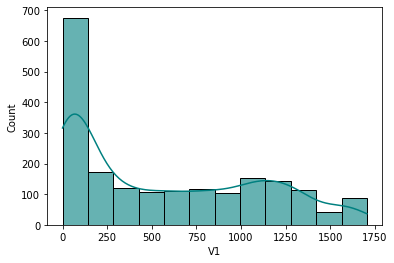

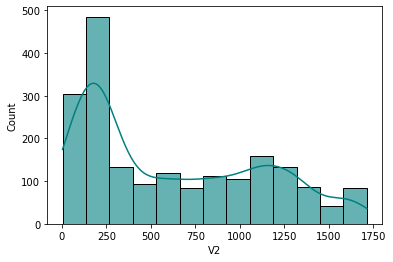

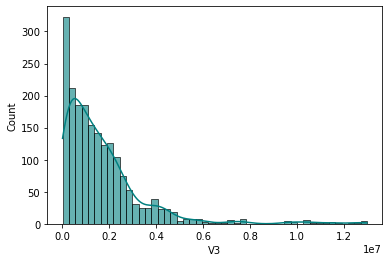

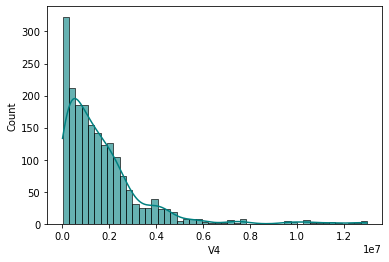

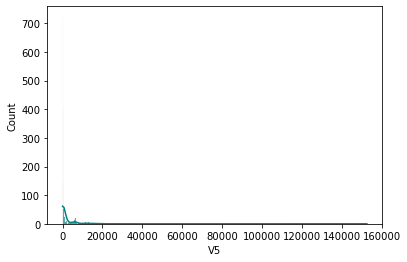

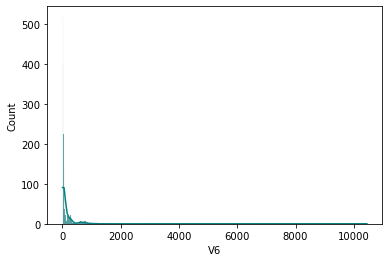

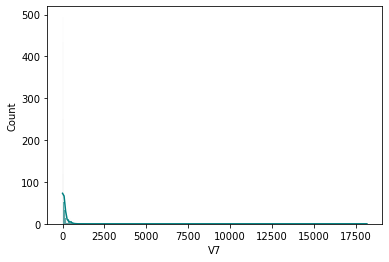

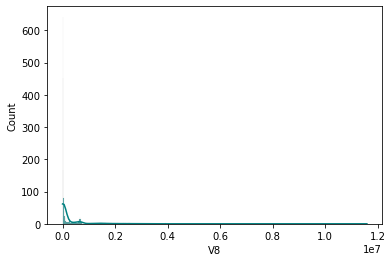

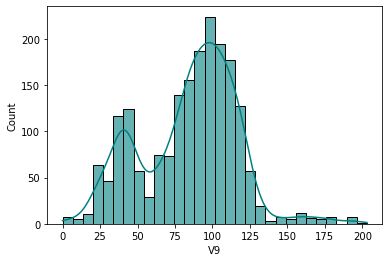

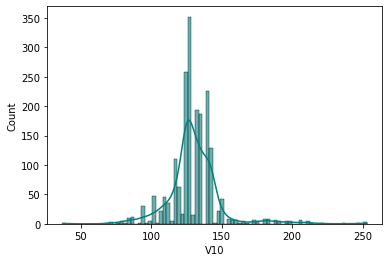

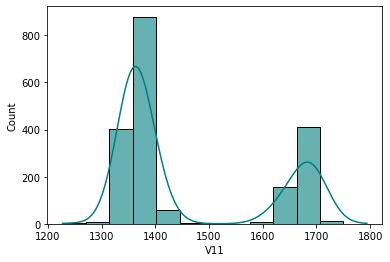

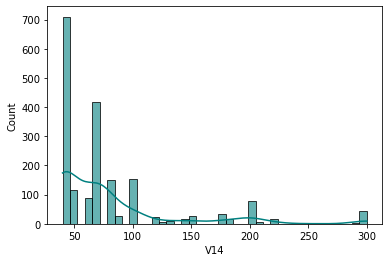

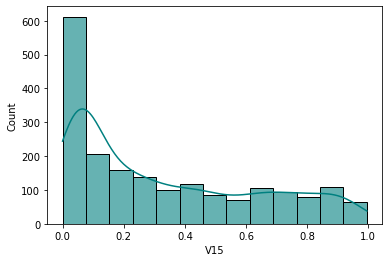

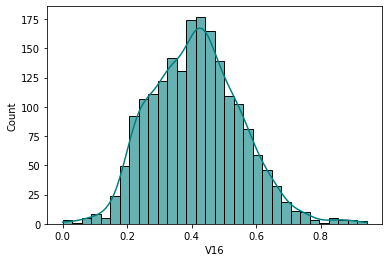

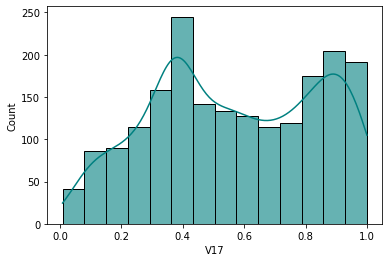

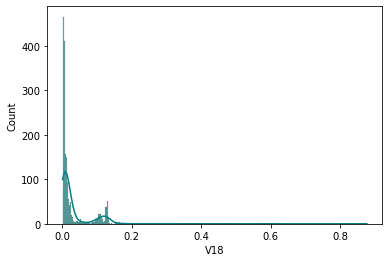

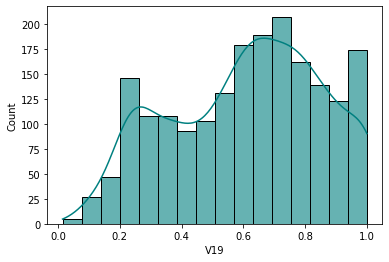

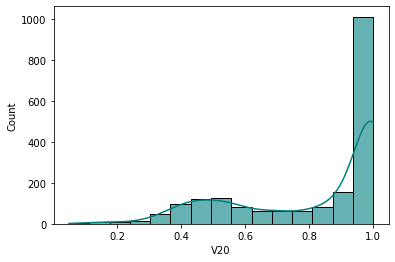

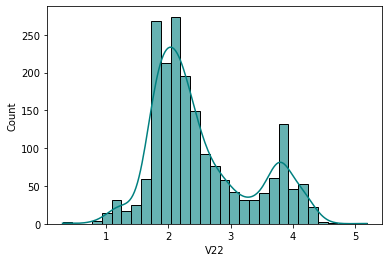

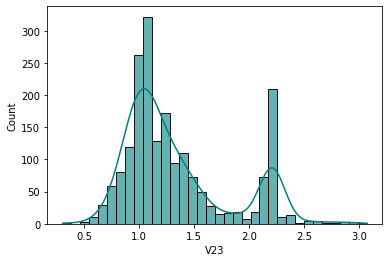

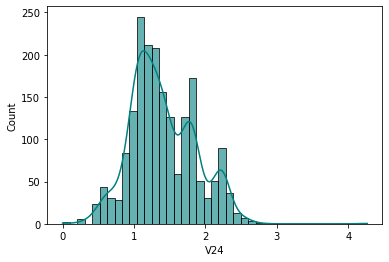

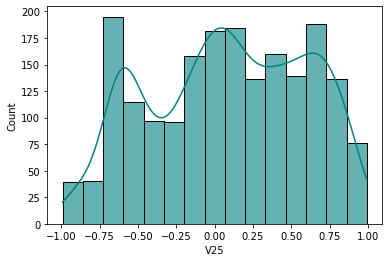

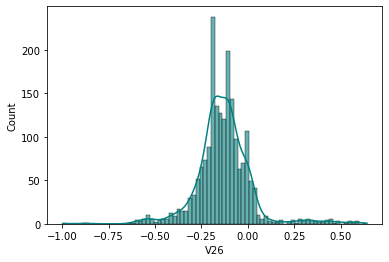

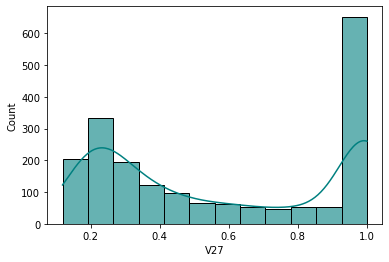

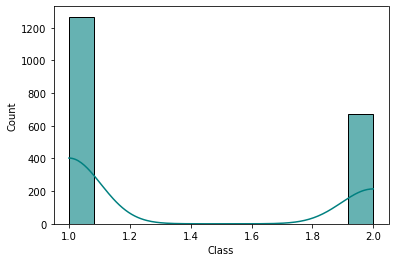

In [65]:
# Numerical Columns - Univariate - Histogram with Density Plot
for var in num_columns: 
    plt.figure()
    sns.histplot(data = data, x = var, kde = True, color='teal', alpha=0.6)

<Figure size 1080x576 with 0 Axes>

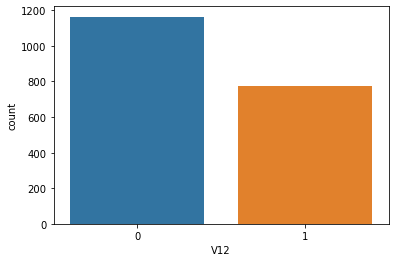

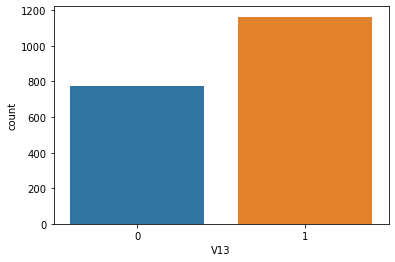

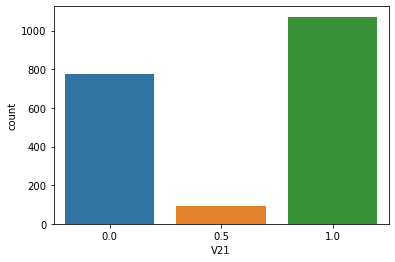

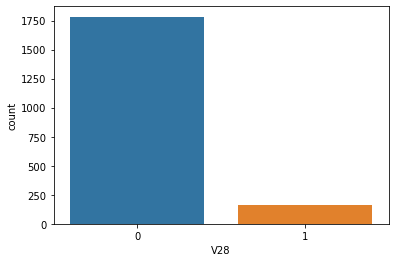

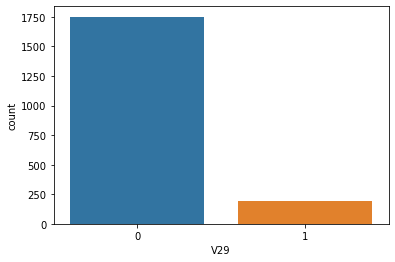

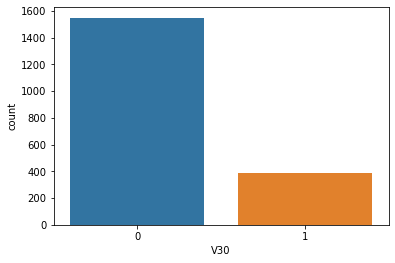

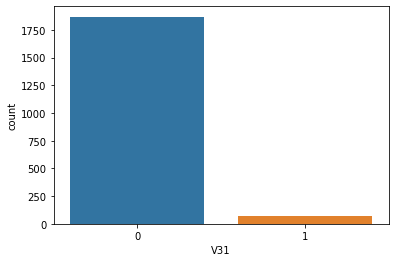

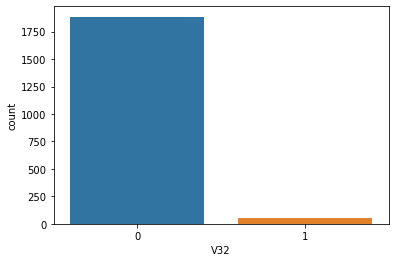

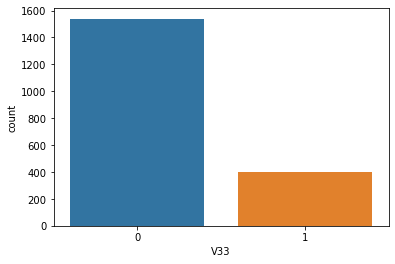

In [66]:
# Categorical Columns - Univariate - Simple Frequency Chart
plt.figure(figsize=(15,8))
for var in cat_columns: 
    plt.figure()
    sns.countplot(data = data, x = var)

<Figure size 1080x576 with 0 Axes>

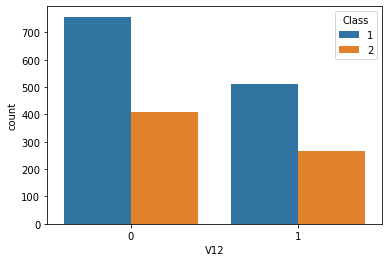

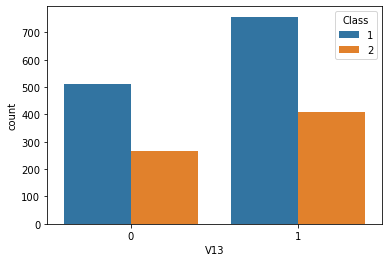

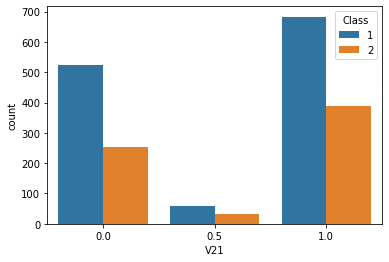

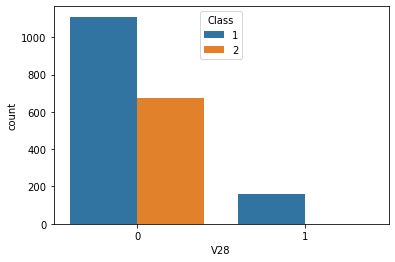

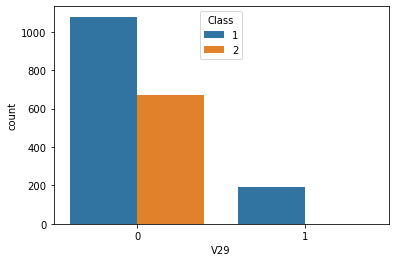

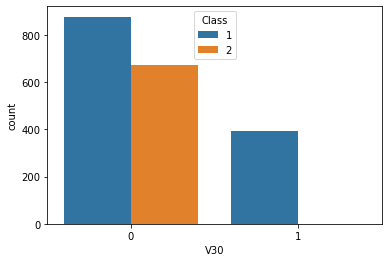

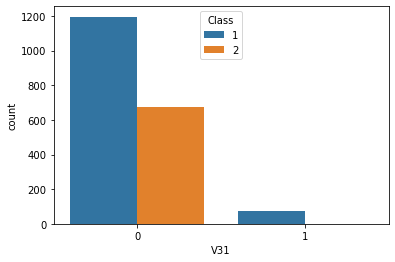

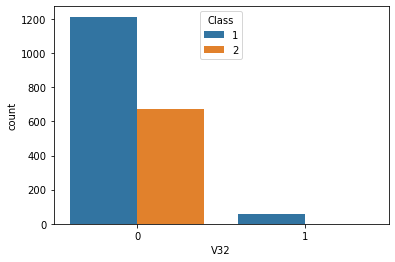

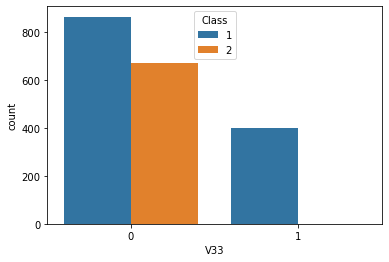

In [67]:
# Categorical Columns - Univariate - Simple Frequency Chart
plt.figure(figsize=(15,8))
for var in cat_columns: 
    plt.figure()
    sns.countplot(data = data, x = var, hue = "Class")

In [ ]:
# Numerical - Numerical Scatter Plot - Scatter Plot Matrix # Subdivided by the Target Variable
sns.pairplot(data)

In [ ]:
# Numerical - Numerical Scatter Plot - Scatter Plot Matrix # Subdivided by the Target Variable
sns.pairplot(data, hue = "Sex")

In [ ]:
for var in num_columns: 
    for i in cat_columns:
        plt.figure()
        sns.catplot(x=i,y=var,data=data,kind='box',col='Class',palette='Dark2')   

In [ ]:
# Heatmap representation of correlation
sns.heatmap(data.corr(), annot=True, cmap = "viridis")

In [ ]:
import statsmodels.api as sm
def qq_plots(df):
    plt.figure(figsize=(10, 4))
    sm.qqplot(df,line='s')
    plt.title("Normal QQPlot")
    plt.show()
for var in num_columns: 
    qq_plots(data[var])
    

## Scikit-Learn

In [69]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder, MaxAbsScaler
from sklearn.preprocessing import PowerTransformer, QuantileTransformer, OneHotEncoder
from sklearn.feature_selection import VarianceThreshold

In [71]:
# Separate the features variables from the Target Variables

X = data.drop(["Class"],axis = 1)
y = data['Class']

In [72]:
# Have a list of categorical and numerical columns

categorical_columns = X.select_dtypes(include='object').columns
numerical_columns = X.select_dtypes(exclude='object').columns

In [73]:
# Encoding Categorical Variables on the entire Feature data

X = pd.get_dummies(data = X, prefix = categorical_columns, prefix_sep='_',
               columns = categorical_columns,
               drop_first =True,
              dtype='int8')
X

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V12_1,V13_1,V21_0.5,V21_1.0,V28_1,V29_1,V30_1,V31_1,V32_1,V33_1
0,42,50,270900,270944,267,17,44,24220,76,108,...,1,0,0,1,1,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,1,0,0,1,1,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,1,0,0,1,1,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,0,1,0,1,1,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0,1,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,249,277,325780,325796,273,54,22,35033,119,141,...,0,1,0,0,0,0,0,0,0,0
1937,144,175,340581,340598,287,44,24,34599,112,133,...,0,1,0,0,0,0,0,0,0,0
1938,145,174,386779,386794,292,40,22,37572,120,140,...,0,1,0,0,0,0,0,0,0,0
1939,137,170,422497,422528,419,97,47,52715,117,140,...,0,1,0,0,0,0,0,0,0,0


In [74]:
# Splitting the data into training and testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [75]:
# Capture the columns of training data

col_names = X_train.columns

In [76]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V12_1,V13_1,V21_0.5,V21_1.0,V28_1,V29_1,V30_1,V31_1,V32_1,V33_1
1330,1050,1071,856766,856784,180,33,23,22591,119,135,...,0,1,0,0,0,0,0,0,0,0
178,174,194,334304,334316,114,38,21,13595,106,134,...,1,0,0,0,0,1,0,0,0,0
769,321,328,294032,294036,17,7,4,2183,121,135,...,0,1,0,0,0,0,0,1,0,0
655,41,218,2187237,2187305,6010,257,123,626586,39,126,...,0,1,0,0,0,0,1,0,0,0
1218,1060,1080,3402848,3402864,125,29,20,11804,81,108,...,1,0,0,0,0,0,0,0,0,1


## Feature Selection

### Constant Features Removal (Zero Variance Removal)

In [77]:
# Filter out any variables with a single constant value

constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(X_train)

VarianceThreshold(threshold=0)

In [78]:
constant_filter.get_support().sum()

34

In [79]:
constant_list = [not temp for temp in constant_filter.get_support()]
constant_list

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False]

In [80]:
constant_filter.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [81]:
col_names = col_names[constant_filter.get_support()]

In [82]:
X_train = pd.DataFrame(constant_filter.transform(X_train),columns = col_names)
X_test = pd.DataFrame(constant_filter.transform(X_test),columns = col_names)

In [83]:
X_train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V12_1,V13_1,V21_0.5,V21_1.0,V28_1,V29_1,V30_1,V31_1,V32_1,V33_1
0,1050.0,1071.0,856766.0,856784.0,180.0,33.0,23.0,22591.0,119.0,135.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,174.0,194.0,334304.0,334316.0,114.0,38.0,21.0,13595.0,106.0,134.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,321.0,328.0,294032.0,294036.0,17.0,7.0,4.0,2183.0,121.0,135.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,41.0,218.0,2187237.0,2187305.0,6010.0,257.0,123.0,626586.0,39.0,126.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1060.0,1080.0,3402848.0,3402864.0,125.0,29.0,20.0,11804.0,81.0,108.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1353,1373.0,1395.0,5971611.0,5971616.0,68.0,24.0,9.0,8685.0,115.0,143.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1354,1061.0,1085.0,3326735.0,3326756.0,161.0,44.0,39.0,15643.0,85.0,124.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1355,438.0,455.0,627768.0,627803.0,415.0,29.0,37.0,45783.0,82.0,127.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1356,42.0,180.0,388190.0,388236.0,4019.0,191.0,102.0,417578.0,41.0,125.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [84]:
0.995*0+0.005*1

0.005

In [85]:
0.995*(0-0.005)**2+0.005*(1-0.005)**2

0.004975

### Quasi Constant Removal (Near Zero Variance)

In [86]:
quasi_constant_filter = VarianceThreshold(threshold=0.001)
quasi_constant_filter.fit(X_train)

VarianceThreshold(threshold=0.001)

In [87]:
quasi_constant_filter.get_support().sum()
col_names = col_names[quasi_constant_filter.get_support()]

In [88]:
X_train = pd.DataFrame(quasi_constant_filter.transform(X_train),columns = col_names)
X_test = pd.DataFrame(quasi_constant_filter.transform(X_test), columns = col_names)

In [89]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V12_1,V13_1,V21_0.5,V21_1.0,V28_1,V29_1,V30_1,V31_1,V32_1,V33_1
0,1050.0,1071.0,856766.0,856784.0,180.0,33.0,23.0,22591.0,119.0,135.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,174.0,194.0,334304.0,334316.0,114.0,38.0,21.0,13595.0,106.0,134.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,321.0,328.0,294032.0,294036.0,17.0,7.0,4.0,2183.0,121.0,135.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,41.0,218.0,2187237.0,2187305.0,6010.0,257.0,123.0,626586.0,39.0,126.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1060.0,1080.0,3402848.0,3402864.0,125.0,29.0,20.0,11804.0,81.0,108.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Remove Duplicate Features

In [90]:
X_train_T = X_train.T
X_test_T = X_test.T

In [91]:
X_train_T = pd.DataFrame(X_train_T)
X_test_T = pd.DataFrame(X_test_T)

In [92]:
X_train_T.shape, X_test_T.shape

((34, 1358), (34, 583))

In [93]:
X_train_T.duplicated().sum()

0

In [94]:
duplicated_features = X_train_T.duplicated()
duplicated_features

V1         False
V2         False
V3         False
V4         False
V5         False
V6         False
V7         False
V8         False
V9         False
V10        False
V11        False
V14        False
V15        False
V16        False
V17        False
V18        False
V19        False
V20        False
V22        False
V23        False
V24        False
V25        False
V26        False
V27        False
V12_1      False
V13_1      False
V21_0.5    False
V21_1.0    False
V28_1      False
V29_1      False
V30_1      False
V31_1      False
V32_1      False
V33_1      False
dtype: bool

In [95]:
features_to_keep = [not index for index in duplicated_features]

In [96]:
col_names = col_names[features_to_keep]

In [97]:
X_train = pd.DataFrame(X_train_T[features_to_keep].T,columns = col_names)
X_test = pd.DataFrame(X_test_T[features_to_keep].T,columns = col_names)

In [98]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V12_1,V13_1,V21_0.5,V21_1.0,V28_1,V29_1,V30_1,V31_1,V32_1,V33_1
0,1050.0,1071.0,856766.0,856784.0,180.0,33.0,23.0,22591.0,119.0,135.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,174.0,194.0,334304.0,334316.0,114.0,38.0,21.0,13595.0,106.0,134.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,321.0,328.0,294032.0,294036.0,17.0,7.0,4.0,2183.0,121.0,135.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,41.0,218.0,2187237.0,2187305.0,6010.0,257.0,123.0,626586.0,39.0,126.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1060.0,1080.0,3402848.0,3402864.0,125.0,29.0,20.0,11804.0,81.0,108.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Correlated Feature Removal

In [99]:
# Take paiwise correlation

corrmat = X_train.corr()

<AxesSubplot:>

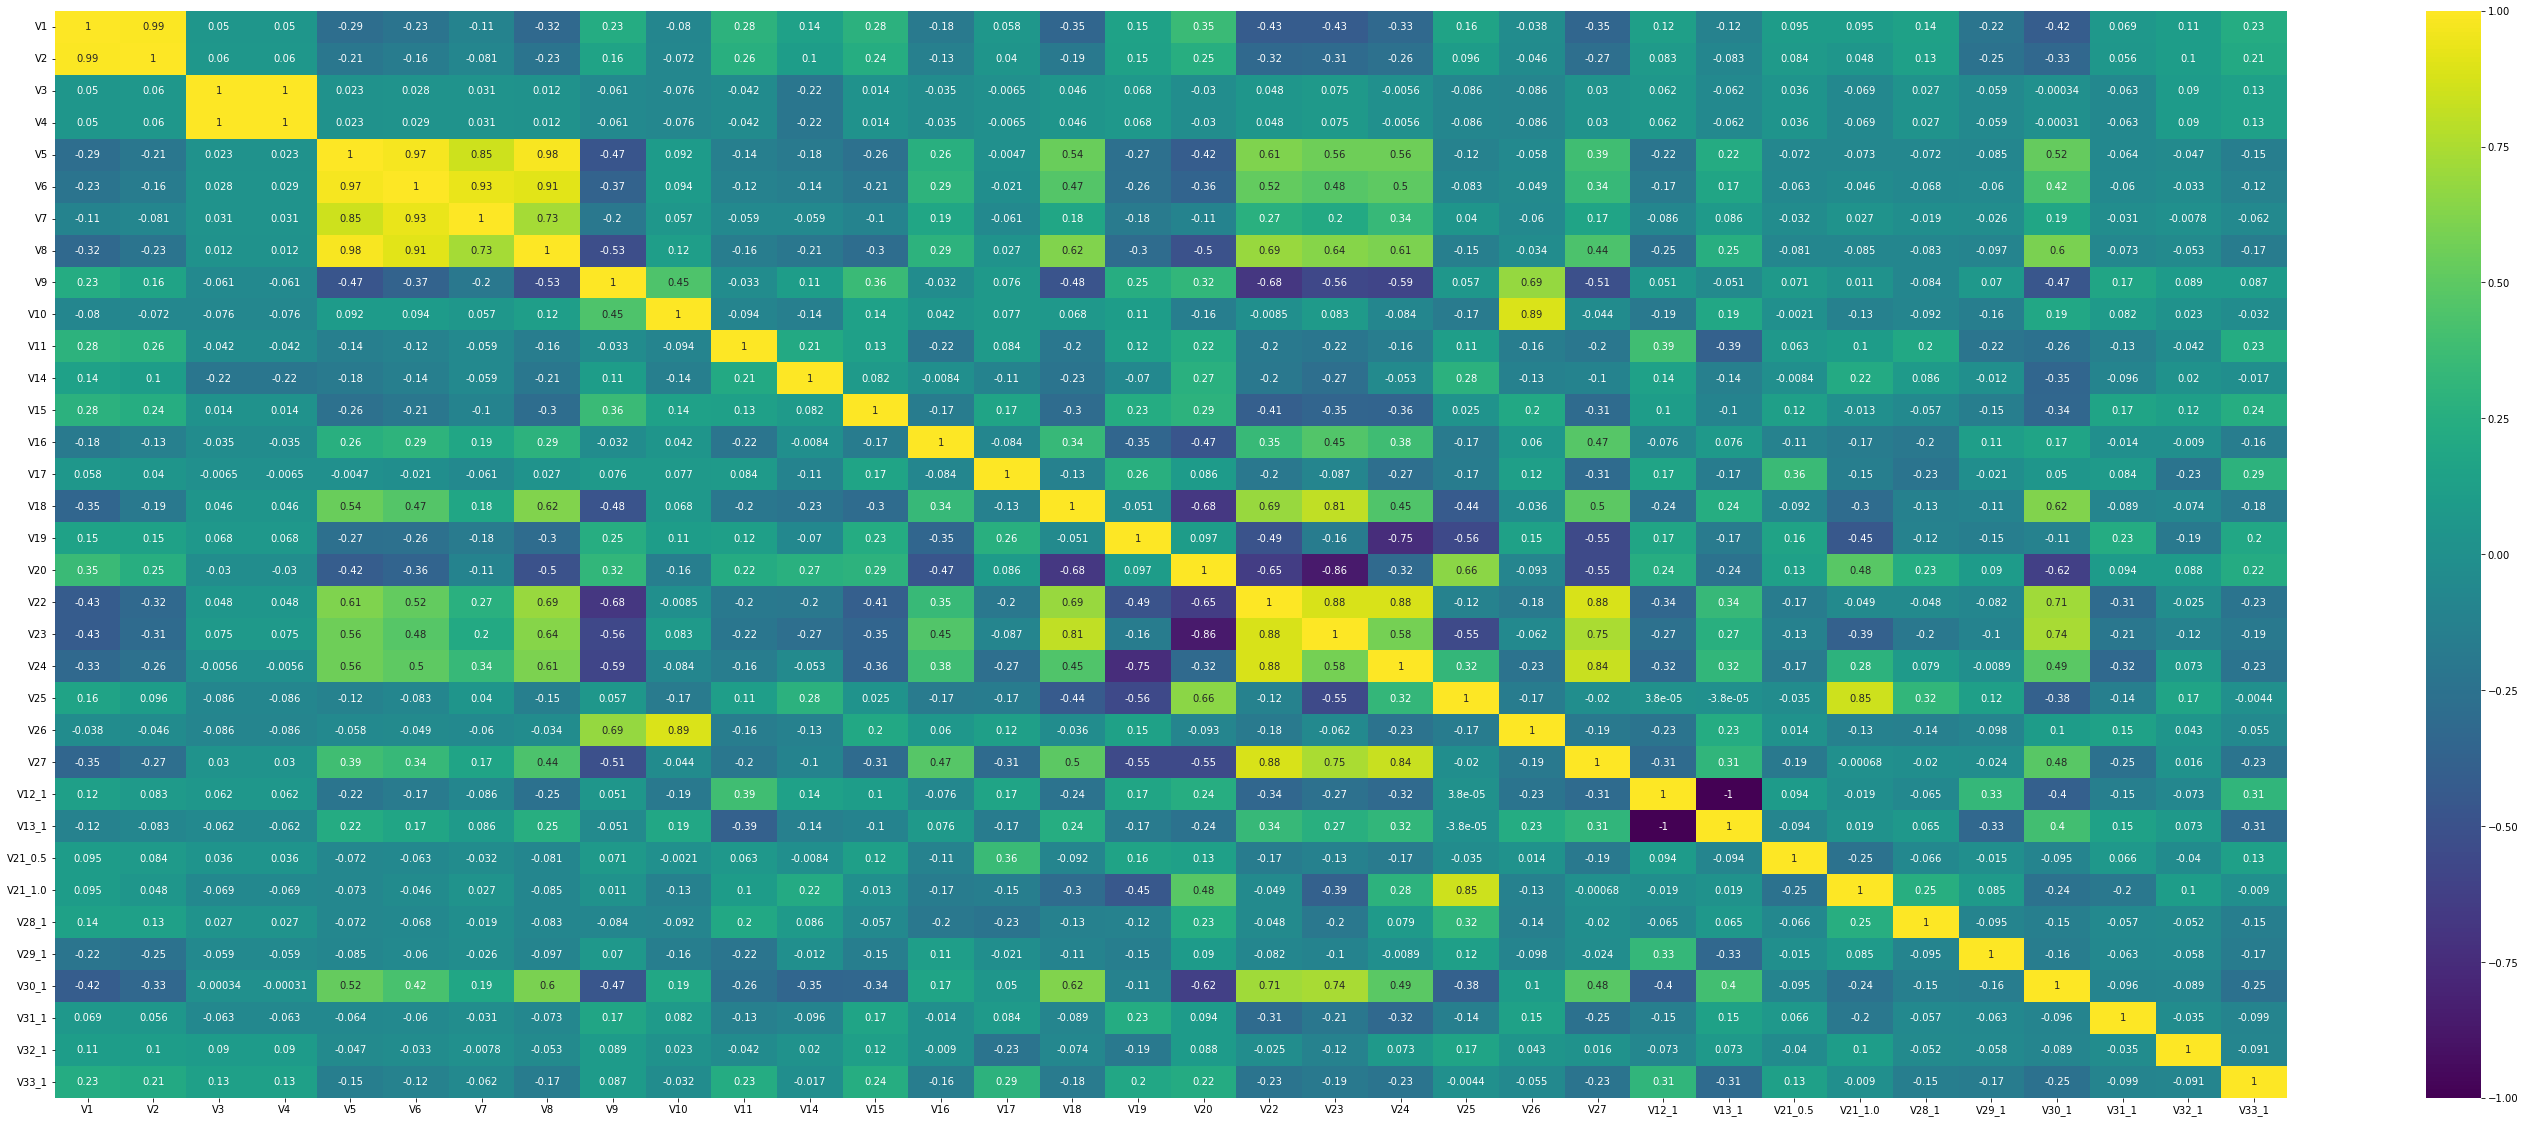

In [141]:
# Heat Map of the correlation

plt.figure(figsize=(50,20))
sns.heatmap(corrmat, annot = True, cmap = 'viridis')

In [142]:
# Function to capture pair wise correlations greater than a set threshold

def get_correlation(data, threshold):
    corr_col = set()
    corrmat = data.corr()
    for i in range(len(corrmat.columns)):
        for j in range(i):
            if abs(corrmat.iloc[i, j])> threshold:
                colname = corrmat.columns[i]
                corr_col.add(colname)
    return corr_col

In [159]:
corr_features = get_correlation(X_train, 0.95)
corr_features

set()

In [144]:
col_names

Index(['V1', 'V3', 'V5', 'V7', 'V9', 'V10', 'V11', 'V14', 'V15', 'V16', 'V17',
       'V18', 'V19', 'V20', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V12_1',
       'V21_0.5', 'V21_1.0', 'V28_1', 'V29_1', 'V30_1', 'V31_1', 'V32_1',
       'V33_1'],
      dtype='object')

In [145]:
X_train = X_train.drop(labels=corr_features, axis = 1)
X_test = X_test.drop(labels = corr_features, axis = 1)

In [146]:
col_names = col_names.drop(corr_features)

In [147]:
X_train.columns = col_names
X_test.columns = col_names

In [148]:
X_train.head()

,V1,V3,V5,V7,V9,V10,V11,V14,V15,V16,...,V27,V12_1,V21_0.5,V21_1.0,V28_1,V29_1,V30_1,V31_1,V32_1,V33_1
0,1050.0,856766.0,180.0,23.0,119.0,135.0,1376.0,40.0,0.4433,0.5238,...,0.6236,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,174.0,334304.0,114.0,21.0,106.0,134.0,1354.0,70.0,0.2570,0.5250,...,0.3977,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,321.0,294032.0,17.0,4.0,121.0,135.0,1358.0,50.0,0.4728,0.3929,...,0.1384,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,41.0,2187237.0,6010.0,123.0,39.0,126.0,1358.0,40.0,0.0604,0.5007,...,1.0000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1060.0,3402848.0,125.0,20.0,81.0,108.0,1364.0,80.0,0.4164,0.6094,...,0.5296,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Feature Grouping and Feature Importance

In [149]:
corrdata = corrmat.abs().stack()
corrdata

V1     V1       1.000000
       V2       0.986805
       V3       0.050417
       V4       0.050400
       V5       0.285765
                  ...   
V33_1  V29_1    0.165858
       V30_1    0.254437
       V31_1    0.099048
       V32_1    0.091457
       V33_1    1.000000
Length: 1156, dtype: float64

In [150]:
corrdata = corrdata.sort_values(ascending=False)
corrdata

V1     V1       1.000000
V20    V20      1.000000
V4     V4       1.000000
V5     V5       1.000000
V6     V6       1.000000
                  ...   
V4     V30_1    0.000311
V25    V12_1    0.000038
V12_1  V25      0.000038
V13_1  V25      0.000038
V25    V13_1    0.000038
Length: 1156, dtype: float64

In [151]:
corrdata = corrdata[corrdata>0.95]
corrdata = corrdata[corrdata<1]
corrdata

V13_1  V12_1    1.000000
V12_1  V13_1    1.000000
V4     V3       1.000000
V3     V4       1.000000
V2     V1       0.986805
V1     V2       0.986805
V8     V5       0.978134
V5     V8       0.978134
V6     V5       0.968753
V5     V6       0.968753
dtype: float64

In [152]:
corrdata = pd.DataFrame(corrdata).reset_index()
corrdata.columns = ['features1', 'features2', 'corr_value']
corrdata

,features1,features2,corr_value
0,V13_1,V12_1,1.000000
1,V12_1,V13_1,1.000000
2,V4,V3,1.000000
3,V3,V4,1.000000
4,V2,V1,0.986805
5,V1,V2,0.986805
6,V8,V5,0.978134
7,V5,V8,0.978134
8,V6,V5,0.968753
9,V5,V6,0.968753


In [153]:
# Groups of the correlated features

grouped_feature_list = []
correlated_groups_list = []
for feature in corrdata.features1.unique():
    if feature not in grouped_feature_list:
        correlated_block = corrdata[corrdata.features1 == feature]
        grouped_feature_list = grouped_feature_list + list(correlated_block.features2.unique()) + [feature]
        correlated_groups_list.append(correlated_block)

In [154]:
correlated_groups_list

[  features1 features2  corr_value
 0     V13_1     V12_1         1.0,
   features1 features2  corr_value
 2        V4        V3         1.0,
   features1 features2  corr_value
 4        V2        V1    0.986805,
   features1 features2  corr_value
 6        V8        V5    0.978134,
   features1 features2  corr_value
 8        V6        V5    0.968753]

In [155]:
for group in correlated_groups_list:
    print(group)

  features1 features2  corr_value
0     V13_1     V12_1         1.0
  features1 features2  corr_value
2        V4        V3         1.0
  features1 features2  corr_value
4        V2        V1    0.986805
  features1 features2  corr_value
6        V8        V5    0.978134
  features1 features2  corr_value
8        V6        V5    0.968753


In [160]:
# Feature importance using RF classifier

from sklearn.ensemble import RandomForestClassifier
important_features = []
for group in correlated_groups_list:
    features = list(group.features1.unique()) + list(group.features2.unique())
    #features = col_names[features]
    rf = RandomForestClassifier(n_estimators=100, random_state=0)
    y_train=y_train.astype('int')
    rf.fit(X_train[features], y_train)
    
    importance = pd.concat([pd.Series(features), pd.Series(rf.feature_importances_)], axis = 1)
    importance.columns = ['features', 'importance']
    importance.sort_values(by = 'importance', ascending = False, inplace = True)
    feat = importance.iloc[0]
    important_features.append(feat)
    

KeyError: "['V13_1'] not in index"

In [161]:
important_features

[]

In [162]:
important_features = pd.DataFrame(important_features)

In [163]:
important_features.reset_index(inplace=True, drop = True)

In [164]:
important_features

""


In [165]:
features_to_consider = set(important_features)

In [166]:
features_to_discard = set(corr_features) - set(features_to_consider)

In [167]:
features_to_discard = list(features_to_discard)

In [168]:
X_train = X_train.drop(labels = features_to_discard, axis = 1)
X_train.shape

(1358, 29)

In [169]:
X_test = X_test.drop(labels=features_to_discard, axis = 1)
X_test.shape

(583, 29)

In [170]:
X_train.head()

,V1,V3,V5,V7,V9,V10,V11,V14,V15,V16,...,V27,V12_1,V21_0.5,V21_1.0,V28_1,V29_1,V30_1,V31_1,V32_1,V33_1
0,1050.0,856766.0,180.0,23.0,119.0,135.0,1376.0,40.0,0.4433,0.5238,...,0.6236,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,174.0,334304.0,114.0,21.0,106.0,134.0,1354.0,70.0,0.2570,0.5250,...,0.3977,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,321.0,294032.0,17.0,4.0,121.0,135.0,1358.0,50.0,0.4728,0.3929,...,0.1384,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,41.0,2187237.0,6010.0,123.0,39.0,126.0,1358.0,40.0,0.0604,0.5007,...,1.0000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1060.0,3402848.0,125.0,20.0,81.0,108.0,1364.0,80.0,0.4164,0.6094,...,0.5296,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Feature selection based on mutual information

In [171]:
from sklearn.feature_selection import VarianceThreshold, mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [172]:
mi = mutual_info_classif(X_train, y_train.astype(int))

In [173]:
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False, inplace = True)

<AxesSubplot:>

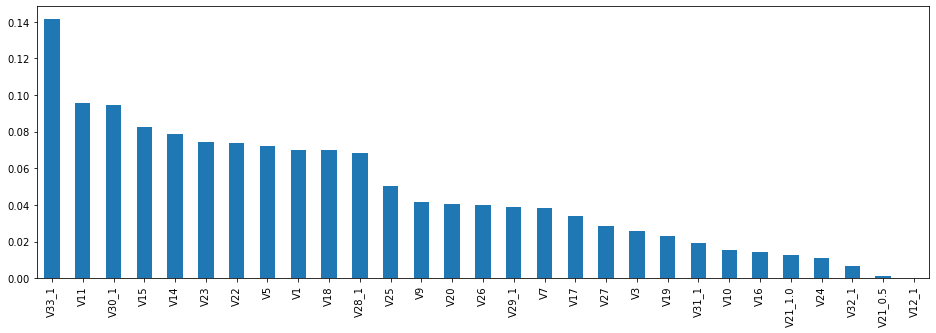

In [174]:
mi.plot.bar(figsize = (16,5))

In [175]:
mi

V33_1      0.141323
V11        0.095712
V30_1      0.094666
V15        0.082511
V14        0.078666
V23        0.074080
V22        0.074051
V5         0.072372
V1         0.069813
V18        0.069778
V28_1      0.068367
V25        0.050318
V9         0.041556
V20        0.040283
V26        0.039743
V29_1      0.039084
V7         0.038240
V17        0.034044
V27        0.028507
V3         0.025891
V19        0.022795
V31_1      0.019268
V10        0.015624
V16        0.014151
V21_1.0    0.012826
V24        0.011272
V32_1      0.006622
V21_0.5    0.000925
V12_1      0.000000
dtype: float64

In [176]:
sel = SelectPercentile(mutual_info_classif, percentile=95).fit(X_train, y_train.astype(int))


In [177]:
X_train.columns[sel.get_support()]

Index(['V1', 'V3', 'V5', 'V7', 'V9', 'V10', 'V11', 'V14', 'V15', 'V16', 'V17',
       'V18', 'V19', 'V20', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V12_1',
       'V28_1', 'V29_1', 'V30_1', 'V31_1', 'V32_1', 'V33_1'],
      dtype='object')

In [178]:
col_names = col_names[sel.get_support()]

In [179]:
col_names

Index(['V1', 'V3', 'V5', 'V7', 'V9', 'V10', 'V11', 'V14', 'V15', 'V16', 'V17',
       'V18', 'V19', 'V20', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V12_1',
       'V28_1', 'V29_1', 'V30_1', 'V31_1', 'V32_1', 'V33_1'],
      dtype='object')

In [180]:
sel.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False,  True,  True,  True,  True,
        True,  True])

In [181]:
len(X_train.columns[sel.get_support()])

27

In [182]:
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

In [183]:
X_train = pd.DataFrame(X_train,columns = col_names)
X_test = pd.DataFrame(X_test,columns = col_names)
X_train.head()

,V1,V3,V5,V7,V9,V10,V11,V14,V15,V16,...,V25,V26,V27,V12_1,V28_1,V29_1,V30_1,V31_1,V32_1,V33_1
0,1050.0,856766.0,180.0,23.0,119.0,135.0,1376.0,40.0,0.4433,0.5238,...,-0.1429,-0.0195,0.6236,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,174.0,334304.0,114.0,21.0,106.0,134.0,1354.0,70.0,0.2570,0.5250,...,-0.4000,-0.0683,0.3977,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,321.0,294032.0,17.0,4.0,121.0,135.0,1358.0,50.0,0.4728,0.3929,...,-0.4286,0.0032,0.1384,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,41.0,2187237.0,6010.0,123.0,39.0,126.0,1358.0,40.0,0.0604,0.5007,...,-0.6158,-0.1855,1.0000,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1060.0,3402848.0,125.0,20.0,81.0,108.0,1364.0,80.0,0.4164,0.6094,...,-0.2000,-0.2623,0.5296,1.0,0.0,0.0,0.0,0.0,0.0,1.0


## Feature selection based on F Score

In [184]:
from sklearn.feature_selection import f_classif, f_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [185]:
sel = f_classif(X_train, y_train)
sel

(array([2.76547313e+01, 1.24894710e+01, 4.34970157e+01, 5.10690127e+00,
        6.84293480e+01, 6.87380953e-01, 1.70014721e+01, 1.29157063e+02,
        1.28574865e+01, 3.32405282e+00, 1.18614435e+01, 3.93040468e+01,
        4.97104038e+00, 7.97261440e+00, 5.16314172e+01, 3.49692472e+01,
        3.09521816e+01, 5.59039476e+00, 1.14752493e+00, 1.02550571e+01,
        1.78179526e-01, 6.65166788e+01, 8.25484741e+01, 2.11707452e+02,
        2.83297477e+01, 2.40793173e+01, 2.26779611e+02]),
 array([1.68327977e-07, 4.23006951e-04, 6.06877979e-11, 2.39889651e-02,
        3.10697935e-16, 4.07202562e-01, 3.96190918e-05, 1.18346283e-28,
        3.48067878e-04, 6.84934082e-02, 5.90555197e-04, 4.86434380e-10,
        2.59383767e-02, 4.81847485e-03, 1.10166706e-12, 4.23360000e-09,
        3.18248581e-08, 1.81994648e-02, 2.84258490e-01, 1.39476119e-03,
        6.73009332e-01, 7.82846395e-16, 3.55215953e-19, 1.12422686e-44,
        1.19600400e-07, 1.03643555e-06, 1.66246721e-47]))

In [186]:
p_values = pd.Series(sel[1])
p_values.index = X_train.columns
p_values.sort_values(ascending = True, inplace = True)

<AxesSubplot:>

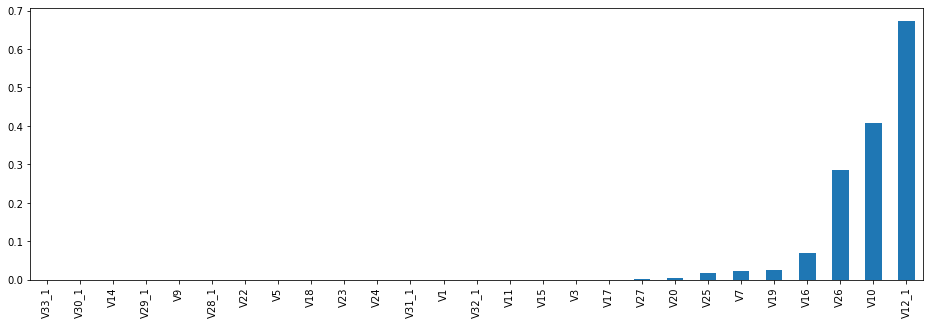

In [187]:
p_values.plot.bar(figsize = (16, 5))

In [188]:
p_values = p_values[p_values<0.05]

In [189]:
p_values.index

Index(['V33_1', 'V30_1', 'V14', 'V29_1', 'V9', 'V28_1', 'V22', 'V5', 'V18',
       'V23', 'V24', 'V31_1', 'V1', 'V32_1', 'V11', 'V15', 'V3', 'V17', 'V27',
       'V20', 'V25', 'V7', 'V19'],
      dtype='object')

In [190]:
X_train_p = X_train[p_values.index]
X_test_p = X_test[p_values.index]

In [191]:
X_train_p.head()

,V33_1,V30_1,V14,V29_1,V9,V28_1,V22,V5,V18,V23,...,V32_1,V11,V15,V3,V17,V27,V20,V25,V7,V19
0,0.0,0.0,40.0,0.0,119.0,0.0,2.2553,180.0,0.0153,1.3222,...,0.0,1376.0,0.4433,856766.0,0.8571,0.6236,0.7826,-0.1429,23.0,0.6364
1,0.0,0.0,70.0,1.0,106.0,0.0,2.0569,114.0,0.0148,1.3010,...,0.0,1354.0,0.2570,334304.0,0.6000,0.3977,0.5714,-0.4000,21.0,0.5263
2,0.0,0.0,50.0,0.0,121.0,0.0,1.2305,17.0,0.0052,0.8451,...,0.0,1358.0,0.4728,294032.0,0.5714,0.1384,1.0000,-0.4286,4.0,1.0000
3,0.0,1.0,40.0,0.0,39.0,0.0,3.7789,6010.0,0.1303,2.2480,...,0.0,1358.0,0.0604,2187237.0,0.3842,1.0000,0.5529,-0.6158,123.0,0.6887
4,1.0,0.0,80.0,0.0,81.0,0.0,2.0969,125.0,0.0147,1.3010,...,0.0,1364.0,0.4164,3402848.0,0.8000,0.5296,0.8000,-0.2000,20.0,0.6897


### using PCA

In [192]:
from sklearn.decomposition import PCA

In [193]:
pca = PCA(n_components=5, random_state=42)
pca.fit(X_train)

PCA(n_components=5, random_state=42)

In [194]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
X_train_pca.shape, X_test_pca.shape

((1358, 5), (583, 5))

## Feature Transformation

In [195]:
# You can perform Box Cox or Yeo-Johnson (Non Normal transformation)
bctrans = PowerTransformer(method = 'yeo-johnson').fit(X_train)
X_train = pd.DataFrame(bctrans.transform(X_train),columns = col_names)
X_test = pd.DataFrame(bctrans.transform(X_test),columns = col_names)
X_train.head()

,V1,V3,V5,V7,V9,V10,V11,V14,V15,V16,...,V25,V26,V27,V12_1,V28_1,V29_1,V30_1,V31_1,V32_1,V33_1
0,0.962219,-0.203988,-0.163774,-0.195111,1.048173,0.282373,-0.575144,-1.121211,0.641935,0.815128,...,-0.466447,0.767520,0.211565,-0.797587,-0.292458,-0.323981,-0.497007,-0.193476,-0.178647,-0.511939
1,-0.468195,-0.907783,-0.487134,-0.283339,0.642011,0.228858,-0.718930,0.372396,0.008644,0.823152,...,-0.954145,0.451804,-0.486163,1.253782,-0.292458,3.086605,-0.497007,-0.193476,-0.178647,-0.511939
2,-0.066300,-0.992124,-2.188835,-2.150688,1.110774,0.282373,-0.718930,-0.430724,0.722809,-0.111478,...,-1.007489,0.910095,-1.450768,-0.797587,-0.292458,-0.323981,-0.497007,5.168586,-0.178647,-0.511939
3,-1.162375,0.672580,1.511399,1.135342,-1.423727,-0.208210,-0.718930,-1.121211,-1.004850,0.659091,...,-1.352714,-0.357338,1.173519,-0.797587,-0.292458,-0.323981,2.012046,-0.193476,-0.178647,-0.511939
4,0.972039,1.158947,-0.419468,-0.331364,-0.134994,-1.256995,-0.575144,0.626819,0.564203,1.368277,...,-0.576119,-0.926130,-0.065531,1.253782,-0.292458,-0.323981,-0.497007,-0.193476,-0.178647,1.953357


In [196]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train),columns = col_names)
X_test = pd.DataFrame(scaler.transform(X_test),columns = col_names)
X_train.head()

,V1,V3,V5,V7,V9,V10,V11,V14,V15,V16,...,V25,V26,V27,V12_1,V28_1,V29_1,V30_1,V31_1,V32_1,V33_1
0,0.962219,-0.203988,-0.163774,-0.195111,1.048173,0.282373,-0.602579,-1.121211,0.641935,0.815128,...,-0.466447,0.767520,0.211565,-0.797587,-0.292458,-0.323981,-0.497007,-0.193476,-0.178647,-0.511939
1,-0.468195,-0.907783,-0.487134,-0.283339,0.642011,0.228858,-0.746418,0.372396,0.008644,0.823152,...,-0.954145,0.451804,-0.486163,1.253782,-0.292458,3.086605,-0.497007,-0.193476,-0.178647,-0.511939
2,-0.066300,-0.992124,-2.188835,-2.150688,1.110774,0.282373,-0.746418,-0.430724,0.722809,-0.111478,...,-1.007489,0.910095,-1.450768,-0.797587,-0.292458,-0.323981,-0.497007,5.168586,-0.178647,-0.511939
3,-1.162375,0.672580,1.511399,1.135342,-1.423727,-0.208210,-0.746418,-1.121211,-1.004850,0.659091,...,-1.352714,-0.357338,1.173519,-0.797587,-0.292458,-0.323981,2.012046,-0.193476,-0.178647,-0.511939
4,0.972039,1.158947,-0.419468,-0.331364,-0.134994,-1.256995,-0.602579,0.626819,0.564203,1.368277,...,-0.576119,-0.926130,-0.065531,1.253782,-0.292458,-0.323981,-0.497007,-0.193476,-0.178647,1.953357


In [197]:
y_train = y_train.astype('int')
y_test = y_test.astype('int')

## Basic Perceptron

In [198]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, balanced_accuracy_score, classification_report, cohen_kappa_score, confusion_matrix, f1_score, precision_recall_curve, precision_score, recall_score, roc_auc_score, roc_curve, plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve

In [199]:
model = Perceptron()
model.fit(X_train,y_train)
model.coef_

array([[-1.05424847e-01,  1.18764444e+00,  1.15525877e+00,
        -4.02431383e-01,  1.98943167e+00,  5.60295032e-01,
        -7.73215802e-03,  1.78467726e+00,  3.31193144e-02,
        -4.52915729e-01,  2.37477042e-01, -2.48727525e-01,
         7.11136948e-01,  1.83007183e+00,  1.33269520e+00,
         2.49650390e+00, -4.94091701e-01,  1.70034749e+00,
        -2.88163747e-01,  1.27248612e+00, -1.14804149e-01,
        -9.67297397e+00, -1.20224403e+01, -7.55117539e+00,
        -4.39468044e+00, -4.88302894e+00, -9.76678406e+00]])

In [200]:
# Accuracy on training data
model.score(X_train,y_train)

1.0

In [201]:
# Predict the model on the Testing Data
y_pred = model.predict(X_test)
# Predict probabilities of belonging to each of the groups
#y_pred_proba = model.predict_proba(X_test)

0.9982847341337907
0.9987179487179487
0.9987163029525032
1.0
0.9974358974358974
0.9961323364535581
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       390
           2       0.99      1.00      1.00       193

    accuracy                           1.00       583
   macro avg       1.00      1.00      1.00       583
weighted avg       1.00      1.00      1.00       583



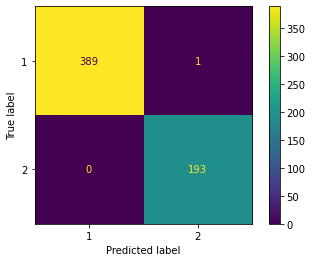

In [202]:
# Print Some importance performance measures
print(accuracy_score(y_test,y_pred))
print(balanced_accuracy_score(y_test,y_pred))
print(f1_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
plot_confusion_matrix(model,X_test,y_test)
print(cohen_kappa_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
#print(roc_auc_score(y_test, y_pred_proba[:,1]))
#plot_roc_curve(model,X_test,y_test)

In [203]:
155/276

0.5615942028985508

In [204]:
# Cross Validation as a better process over train-test split
from sklearn.model_selection import cross_val_score
scores_accuracy = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
scores_balanced_accuracy = cross_val_score(model, X_train, y_train, cv=10, scoring='balanced_accuracy')
scores_auc = cross_val_score(model, X_train, y_train, cv=10, scoring='roc_auc')
scores_accuracy.mean(),scores_balanced_accuracy.mean(), scores_auc.mean()

(0.9977941176470588, 0.996875, 1.0)

In [205]:
scores_accuracy, scores_balanced_accuracy, scores_auc

(array([1.        , 1.        , 1.        , 1.        , 0.99264706,
        0.98529412, 1.        , 1.        , 1.        , 1.        ]),
 array([1.        , 1.        , 1.        , 1.        , 0.98958333,
        0.97916667, 1.        , 1.        , 1.        , 1.        ]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]))

## Logistic Regression

In [206]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, balanced_accuracy_score, classification_report, cohen_kappa_score, confusion_matrix, f1_score, precision_recall_curve, precision_score, recall_score, roc_auc_score, roc_curve, plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve

In [207]:
model = LogisticRegression()
model.fit(X_train,y_train)
model.coef_

array([[ 0.09438366, -0.08085717,  0.00790491, -0.08218786,  0.3179995 ,
        -0.0899982 ,  0.11364356,  0.21246725,  0.0569483 ,  0.12908313,
        -0.15068344, -0.2734155 ,  0.10756096, -0.07085659,  0.04251361,
         0.23703565, -0.30365874,  0.25206924, -0.17339018,  0.11723663,
        -0.13718266, -2.62739731, -2.76272559, -3.43161556, -1.79291976,
        -1.67991606, -3.91445896]])

In [208]:
# Accuracy on training data
model.score(X_train,y_train)

1.0

In [209]:
# Predict the model on the Testing Data
y_pred = model.predict(X_test)
# Predict probabilities of belonging to each of the groups
y_pred_proba = model.predict_proba(X_test)

1.0
1.0
1.0
1.0
1.0
1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       390
           2       1.00      1.00      1.00       193

    accuracy                           1.00       583
   macro avg       1.00      1.00      1.00       583
weighted avg       1.00      1.00      1.00       583

1.0


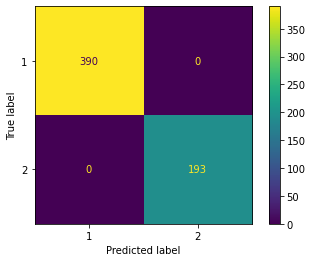

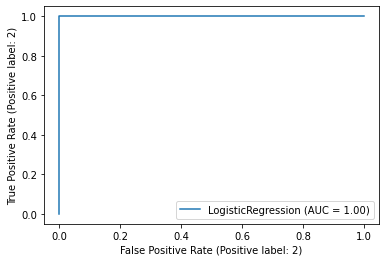

In [210]:
print(accuracy_score(y_test,y_pred))
print(balanced_accuracy_score(y_test,y_pred))
print(f1_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
plot_confusion_matrix(model,X_test,y_test)
print(cohen_kappa_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test, y_pred_proba[:,1]))
plot_roc_curve(model,X_test,y_test)

In [211]:
# Cross Validation as a better process over train-test split
from sklearn.model_selection import cross_val_score
scores_accuracy = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
scores_balanced_accuracy = cross_val_score(model, X_train, y_train, cv=10, scoring='balanced_accuracy')
scores_auc = cross_val_score(model, X_train, y_train, cv=10, scoring='roc_auc')
scores_accuracy.mean(),scores_balanced_accuracy.mean(), scores_auc.mean()

(1.0, 1.0, 1.0)

In [212]:
scores_accuracy,scores_balanced_accuracy,scores_auc

(array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]))

In [213]:
# Hyper parameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
param_grid = {'penalty':['l1','l2','elasticnet','none'],
              'C':[0.01,0.1,1,10,100],
              'fit_intercept':[True, False]}

In [214]:
# Initiate your model
model = LogisticRegression(random_state = 0)
# Get a list of all possible parameters

grid_search_acc = GridSearchCV(estimator = model,  
                           param_grid = param_grid,
                           scoring = 'accuracy',
                           cv = 10,
                           verbose=0)
grid_search_Bal_acc = GridSearchCV(estimator = model,  
                           param_grid = param_grid,
                           scoring = 'balanced_accuracy',
                           cv = 10,
                           verbose=0)
grid_search_auc = GridSearchCV(estimator = model,  
                           param_grid = param_grid,
                           scoring = 'roc_auc',
                           cv = 10,
                           verbose=0)
grid_search_acc.fit(X_train, y_train)
grid_search_Bal_acc.fit(X_train, y_train)
grid_search_auc.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(random_state=0),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'fit_intercept': [True, False],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']},
             scoring='roc_auc')

In [215]:
print(grid_search_acc.best_params_)
print(grid_search_Bal_acc.best_params_)
print(grid_search_auc.best_params_)

{'C': 0.01, 'fit_intercept': True, 'penalty': 'none'}
{'C': 0.01, 'fit_intercept': True, 'penalty': 'none'}
{'C': 0.01, 'fit_intercept': True, 'penalty': 'l2'}


In [216]:
y_pred = grid_search_acc.predict(X_test)

In [217]:
grid_search_acc

GridSearchCV(cv=10, estimator=LogisticRegression(random_state=0),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'fit_intercept': [True, False],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']},
             scoring='accuracy')

In [218]:
print(accuracy_score(y_test,y_pred))
print(balanced_accuracy_score(y_test,y_pred))
print(f1_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))
print(cohen_kappa_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test, y_pred_proba[:,1]))

1.0
1.0
1.0
1.0
1.0
[[390   0]
 [  0 193]]
1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       390
           2       1.00      1.00      1.00       193

    accuracy                           1.00       583
   macro avg       1.00      1.00      1.00       583
weighted avg       1.00      1.00      1.00       583

1.0


## Logistic Regression using statsmodels

In [219]:
import statsmodels.api as sm

In [222]:
y_train = y_train.values.reshape(-1,2)
# building the model and fitting the data
log_reg = sm.Logit(y_train, X_train).fit()

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [223]:
# printing the summary table
print(log_reg.summary())

NameError: name 'log_reg' is not defined

In [224]:
# performing predictions on the test datdaset
yhat = log_reg.predict(X_test)
prediction = list(map(round, yhat))

NameError: name 'log_reg' is not defined

In [225]:
print(accuracy_score(y_test,prediction))

NameError: name 'prediction' is not defined

## KNN Classifier

In [226]:
from sklearn.neighbors import KNeighborsClassifier

In [227]:
model = KNeighborsClassifier()
model.fit(X_train,y_train)

KNeighborsClassifier()

In [228]:
# Accuracy on training data
model.score(X_train,y_train)

0.9933726067746687

In [229]:
# Predict the model on the Testing Data
y_pred = model.predict(X_test)
# Predict probabilities of belonging to each of the groups
y_pred_proba = model.predict_proba(X_test)

0.9879931389365352
0.9897170187325628
0.9909677419354839
0.9974025974025974
0.9846153846153847
0.9730671506352088
              precision    recall  f1-score   support

           1       1.00      0.98      0.99       390
           2       0.97      0.99      0.98       193

    accuracy                           0.99       583
   macro avg       0.98      0.99      0.99       583
weighted avg       0.99      0.99      0.99       583

0.9971834728311412


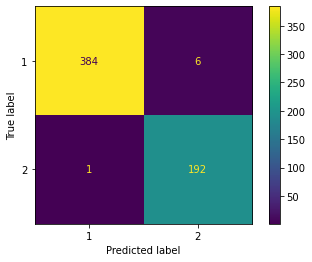

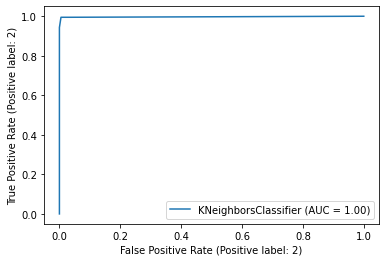

In [230]:
print(accuracy_score(y_test,y_pred))
print(balanced_accuracy_score(y_test,y_pred))
print(f1_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
plot_confusion_matrix(model,X_test,y_test)
print(cohen_kappa_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test, y_pred_proba[:,1]))
plot_roc_curve(model,X_test,y_test)

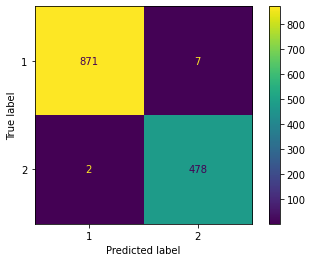

In [231]:
plot_confusion_matrix(model,X_train,y_train)

In [232]:
# Cross Validation as a better process over train-test split
from sklearn.model_selection import cross_val_score
scores_accuracy = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
scores_balanced_accuracy = cross_val_score(model, X_train, y_train, cv=10, scoring='balanced_accuracy')
scores_auc = cross_val_score(model, X_train, y_train, cv=10, scoring='roc_auc')
scores_accuracy.mean(),scores_balanced_accuracy.mean(), scores_auc.mean()

(0.9874836601307191, 0.988433908045977, 0.9967088721264368)

In [233]:
scores_accuracy,scores_balanced_accuracy,scores_auc

(array([0.99264706, 0.99264706, 0.98529412, 0.99264706, 0.97058824,
        0.99264706, 0.99264706, 0.97794118, 0.99259259, 0.98518519]),
 array([0.99431818, 0.99431818, 0.97916667, 0.99431818, 0.97253788,
        0.99431818, 0.99431818, 0.98295455, 0.99425287, 0.98383621]),
 array([0.99976326, 0.99928977, 0.97845644, 1.        , 0.99195076,
        0.99952652, 0.99928977, 0.9991714 , 0.99988027, 0.99976054]))

In [234]:
# Hyper parameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
param_grid = {'n_neighbors':[1,3,5,7,9,11,13],
              'p':[1,2,3],
              'weights':['uniform', 'distance'],
              'algorithm':["auto", "ball_tree", "kd_tree", "brute"]}

In [236]:
# Initiate your model
model = KNeighborsClassifier()
# Get a list of all possible parameters

grid_search_acc = GridSearchCV(estimator = model,  
                           param_grid = param_grid,
                           scoring = 'accuracy',
                           cv = 10,
                           verbose=0)
grid_search_Bal_acc = GridSearchCV(estimator = model,  
                           param_grid = param_grid,
                           scoring = 'balanced_accuracy',
                           cv = 10,
                           verbose=0)
grid_search_auc = GridSearchCV(estimator = model,  
                           param_grid = param_grid,
                           scoring = 'roc_auc',
                           cv = 10,
                           verbose=0)
grid_search_acc.fit(X_train, y_train)
grid_search_Bal_acc.fit(X_train, y_train)
grid_search_auc.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 3, 5, 7, 9, 11, 13], 'p': [1, 2, 3],
                         'weights': ['uniform', 'distance']},
             scoring='roc_auc')

In [237]:
print(grid_search_acc.best_params_)
print(grid_search_Bal_acc.best_params_)
print(grid_search_auc.best_params_)

{'algorithm': 'auto', 'n_neighbors': 1, 'p': 3, 'weights': 'uniform'}
{'algorithm': 'auto', 'n_neighbors': 1, 'p': 3, 'weights': 'uniform'}
{'algorithm': 'auto', 'n_neighbors': 5, 'p': 3, 'weights': 'distance'}


In [238]:
y_pred = grid_search_acc.predict(X_test)

In [239]:
grid_search_acc

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 3, 5, 7, 9, 11, 13], 'p': [1, 2, 3],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [240]:
print(accuracy_score(y_test,y_pred))
print(balanced_accuracy_score(y_test,y_pred))
print(f1_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))
print(cohen_kappa_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test, y_pred_proba[:,1]))

0.9914236706689536
0.9922811212966653
0.9935649935649936
0.9974160206718347
0.9897435897435898
[[386   4]
 [  1 192]]
0.9807120974518795
              precision    recall  f1-score   support

           1       1.00      0.99      0.99       390
           2       0.98      0.99      0.99       193

    accuracy                           0.99       583
   macro avg       0.99      0.99      0.99       583
weighted avg       0.99      0.99      0.99       583

0.9971834728311412


Maximum accuracy:- 0.9948542024013722 at K = 1


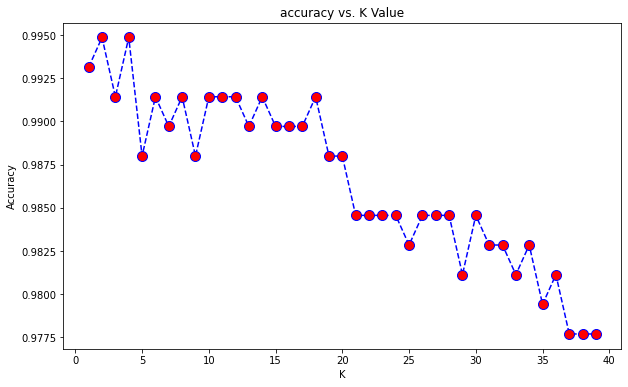

In [241]:
acc = []
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

# Support Vector Machines

In [289]:
from sklearn.svm import SVC

In [243]:
model = SVC(probability = True)
model.fit(X_train,y_train)

SVC(probability=True)

In [244]:
# Accuracy on training data
model.score(X_train,y_train)

1.0

In [245]:
# Predict the model on the Testing Data
y_pred = model.predict(X_test)
# Predict probabilities of belonging to each of the groups
y_pred_proba = model.predict_proba(X_test)

1.0
1.0
1.0
1.0
1.0
1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       390
           2       1.00      1.00      1.00       193

    accuracy                           1.00       583
   macro avg       1.00      1.00      1.00       583
weighted avg       1.00      1.00      1.00       583

1.0


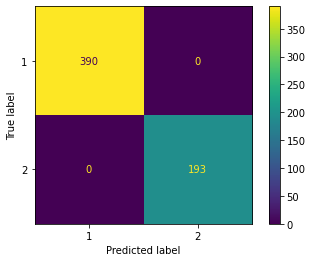

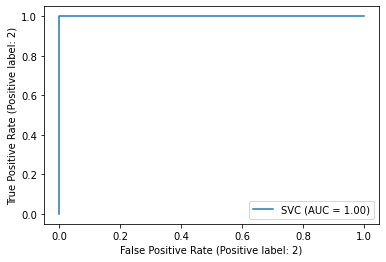

In [246]:
print(accuracy_score(y_test,y_pred))
print(balanced_accuracy_score(y_test,y_pred))
print(f1_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
plot_confusion_matrix(model,X_test,y_test)
print(cohen_kappa_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test, y_pred_proba[:,1]))
plot_roc_curve(model,X_test,y_test)

In [247]:
# Cross Validation as a better process over train-test split
from sklearn.model_selection import cross_val_score
scores_accuracy = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
scores_balanced_accuracy = cross_val_score(model, X_train, y_train, cv=10, scoring='balanced_accuracy')
scores_auc = cross_val_score(model, X_train, y_train, cv=10, scoring='roc_auc')
scores_accuracy.mean(),scores_balanced_accuracy.mean(), scores_auc.mean()

(0.9977886710239652, 0.996875, 1.0)

In [248]:
scores_accuracy,scores_balanced_accuracy,scores_auc

(array([0.99264706, 1.        , 1.        , 1.        , 1.        ,
        1.        , 0.99264706, 1.        , 0.99259259, 1.        ]),
 array([0.98958333, 1.        , 1.        , 1.        , 1.        ,
        1.        , 0.98958333, 1.        , 0.98958333, 1.        ]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]))

In [249]:
# Hyper parameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
param_grid = {'C':[0.01,0.1,1,10,100],
              'degree':[2,3],
              'kernel':['linear', 'poly','rbf','sigmoid'],
              'gamma':['scale','auto',0.01,0.05,0.2]}

In [251]:
# Initiate your model
model = SVC()
# Get a list of all possible parameters

grid_search_acc = GridSearchCV(estimator = model,  
                           param_grid = param_grid,
                           scoring = 'accuracy',
                           cv = 10,
                           verbose=0)
grid_search_Bal_acc = GridSearchCV(estimator = model,  
                           param_grid = param_grid,
                           scoring = 'balanced_accuracy',
                           cv = 10,
                           verbose=0)
grid_search_auc = GridSearchCV(estimator = model,  
                           param_grid = param_grid,
                           scoring = 'roc_auc',
                           cv = 10,
                           verbose=0)
grid_search_acc.fit(X_train, y_train)
grid_search_Bal_acc.fit(X_train, y_train)
grid_search_auc.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'degree': [2, 3],
                         'gamma': ['scale', 'auto', 0.01, 0.05, 0.2],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='roc_auc')

In [252]:
print(grid_search_acc.best_params_)
print(grid_search_Bal_acc.best_params_)
print(grid_search_auc.best_params_)

{'C': 0.01, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
{'C': 0.01, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
{'C': 0.01, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}


In [253]:
y_pred = grid_search_acc.predict(X_test)

In [254]:
grid_search_acc

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'degree': [2, 3],
                         'gamma': ['scale', 'auto', 0.01, 0.05, 0.2],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [255]:
print(accuracy_score(y_test,y_pred))
print(balanced_accuracy_score(y_test,y_pred))
print(f1_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))
print(cohen_kappa_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test, y_pred_proba[:,1]))

1.0
1.0
1.0
1.0
1.0
[[390   0]
 [  0 193]]
1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       390
           2       1.00      1.00      1.00       193

    accuracy                           1.00       583
   macro avg       1.00      1.00      1.00       583
weighted avg       1.00      1.00      1.00       583

1.0


# Decision Tree

In [256]:
from sklearn.tree import DecisionTreeClassifier

In [257]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [258]:
# Accuracy on training data
model.score(X_train,y_train)

1.0

In [259]:
# Predict the model on the Testing Data
y_pred = model.predict(X_test)
# Predict probabilities of belonging to each of the groups
y_pred_proba = model.predict_proba(X_test)

1.0
1.0
1.0
1.0
1.0
1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       390
           2       1.00      1.00      1.00       193

    accuracy                           1.00       583
   macro avg       1.00      1.00      1.00       583
weighted avg       1.00      1.00      1.00       583

1.0


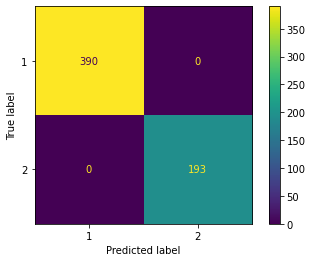

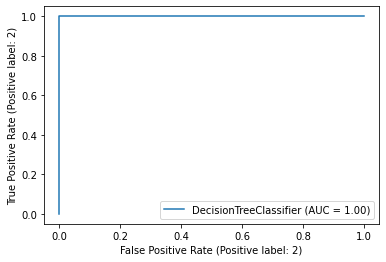

In [260]:
print(accuracy_score(y_test,y_pred))
print(balanced_accuracy_score(y_test,y_pred))
print(f1_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
plot_confusion_matrix(model,X_test,y_test)
print(cohen_kappa_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test, y_pred_proba[:,1]))
plot_roc_curve(model,X_test,y_test)

In [261]:
# Cross Validation as a better process over train-test split
from sklearn.model_selection import cross_val_score
scores_accuracy = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
scores_balanced_accuracy = cross_val_score(model, X_train, y_train, cv=10, scoring='balanced_accuracy')
scores_auc = cross_val_score(model, X_train, y_train, cv=10, scoring='roc_auc')
scores_accuracy.mean(),scores_balanced_accuracy.mean(), scores_auc.mean()

(1.0, 1.0, 1.0)

In [262]:
scores_accuracy,scores_balanced_accuracy,scores_auc

(array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]))

In [263]:
# Hyper parameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
param_grid = {'criterion':['gini','entropy'],
              'max_depth':[2,3,4,5,"None"],
              'min_samples_split':[2,3,5,8],
              'max_features':[2,3,5,8,"None"]}

In [264]:
# Initiate your model
model = DecisionTreeClassifier()
# Get a list of all possible parameters

grid_search_acc = GridSearchCV(estimator = model,  
                           param_grid = param_grid,
                           scoring = 'accuracy',
                           cv = 10,
                           verbose=0)
grid_search_Bal_acc = GridSearchCV(estimator = model,  
                           param_grid = param_grid,
                           scoring = 'balanced_accuracy',
                           cv = 10,
                           verbose=0)
grid_search_auc = GridSearchCV(estimator = model,  
                           param_grid = param_grid,
                           scoring = 'roc_auc',
                           cv = 10,
                           verbose=0)
grid_search_acc.fit(X_train, y_train)
grid_search_Bal_acc.fit(X_train, y_train)
grid_search_auc.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 'None'],
                         'max_features': [2, 3, 5, 8, 'None'],
                         'min_samples_split': [2, 3, 5, 8]},
             scoring='roc_auc')

In [265]:
print(grid_search_acc.best_params_)
print(grid_search_Bal_acc.best_params_)
print(grid_search_auc.best_params_)

{'criterion': 'gini', 'max_depth': 5, 'max_features': 8, 'min_samples_split': 5}
{'criterion': 'entropy', 'max_depth': 5, 'max_features': 8, 'min_samples_split': 5}
{'criterion': 'gini', 'max_depth': 5, 'max_features': 8, 'min_samples_split': 8}


In [266]:
y_pred = grid_search_acc.predict(X_test)

In [267]:
grid_search_acc

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 'None'],
                         'max_features': [2, 3, 5, 8, 'None'],
                         'min_samples_split': [2, 3, 5, 8]},
             scoring='accuracy')

In [268]:
print(accuracy_score(y_test,y_pred))
print(balanced_accuracy_score(y_test,y_pred))
print(f1_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))
print(cohen_kappa_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test, y_pred_proba[:,1]))

0.7855917667238422
0.7520658961073469
0.8415716096324461
0.8320802005012531
0.8512820512820513
[[332  58]
 [ 67 126]]
0.5101400176114326
              precision    recall  f1-score   support

           1       0.83      0.85      0.84       390
           2       0.68      0.65      0.67       193

    accuracy                           0.79       583
   macro avg       0.76      0.75      0.76       583
weighted avg       0.78      0.79      0.78       583

1.0


In [269]:
# Visualizing the decision tree
model = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, max_features= None, min_samples_split= 2)
model.fit(X_train,y_train)
from sklearn import tree
text_representation = tree.export_text(model)
print(text_representation)

|--- feature_26 <= 0.72
|   |--- feature_23 <= 0.76
|   |   |--- feature_22 <= 1.38
|   |   |   |--- class: 2
|   |   |--- feature_22 >  1.38
|   |   |   |--- class: 1
|   |--- feature_23 >  0.76
|   |   |--- class: 1
|--- feature_26 >  0.72
|   |--- class: 1



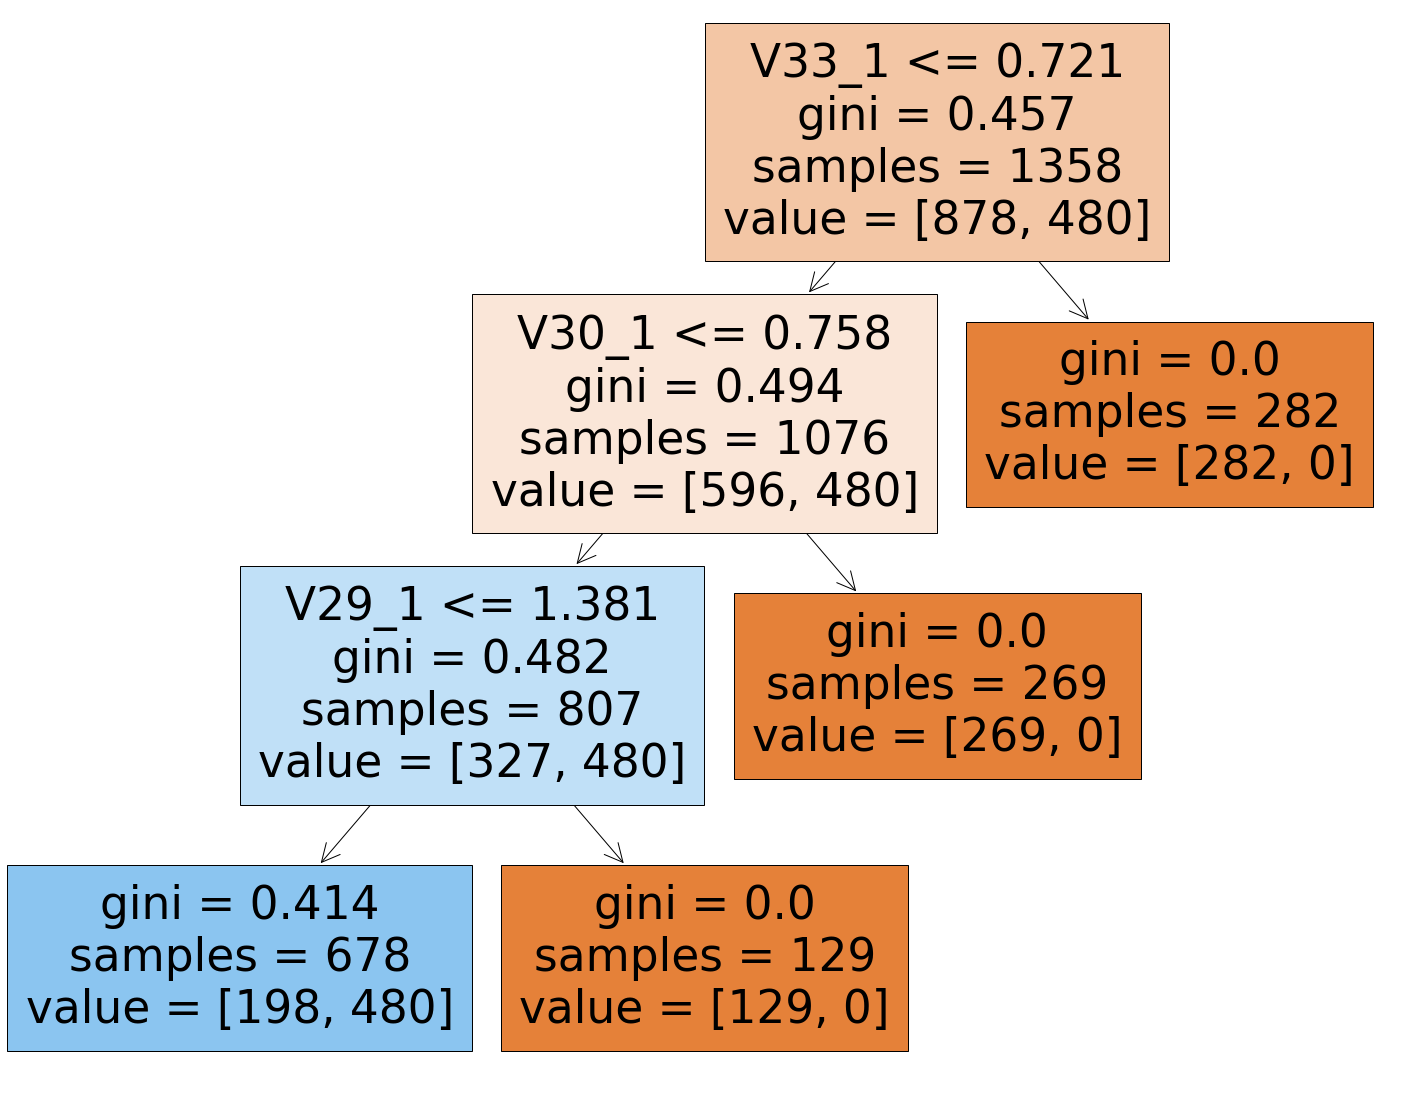

In [270]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, 
                   feature_names=X_train.columns,
                   filled=True)

In [271]:
fig.savefig("decistion_tree.png")

## Random Forest Classification

In [272]:
from sklearn.ensemble import RandomForestClassifier

In [273]:
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [274]:
# Accuracy on training data
model.score(X_train,y_train)

1.0

In [275]:
# Predict the model on the Testing Data
y_pred = model.predict(X_test)
# Predict probabilities of belonging to each of the groups
y_pred_proba = model.predict_proba(X_test)

0.9982847341337907
0.9987179487179487
0.9987163029525032
1.0
0.9974358974358974
0.9961323364535581
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       390
           2       0.99      1.00      1.00       193

    accuracy                           1.00       583
   macro avg       1.00      1.00      1.00       583
weighted avg       1.00      1.00      1.00       583

0.9999867144944864


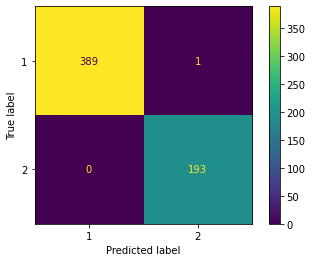

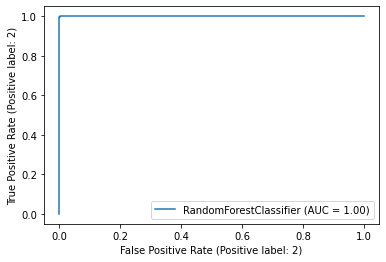

In [276]:
print(accuracy_score(y_test,y_pred))
print(balanced_accuracy_score(y_test,y_pred))
print(f1_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
plot_confusion_matrix(model,X_test,y_test)
print(cohen_kappa_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test, y_pred_proba[:,1]))
plot_roc_curve(model,X_test,y_test)

In [277]:
# Cross Validation as a better process over train-test split
from sklearn.model_selection import cross_val_score
scores_accuracy = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
scores_balanced_accuracy = cross_val_score(model, X_train, y_train, cv=10, scoring='balanced_accuracy')
scores_auc = cross_val_score(model, X_train, y_train, cv=10, scoring='roc_auc')
scores_accuracy.mean(),scores_balanced_accuracy.mean(), scores_auc.mean()

(0.9933605664488017, 0.9945826802507837, 0.999904214559387)

In [278]:
scores_accuracy,scores_balanced_accuracy,scores_auc

(array([1.        , 1.        , 0.98529412, 1.        , 0.98529412,
        1.        , 0.99264706, 1.        , 0.97037037, 1.        ]),
 array([1.        , 1.        , 0.97916667, 1.        , 1.        ,
        0.99431818, 0.98958333, 1.        , 0.98275862, 1.        ]),
 array([1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 0.99904215, 1.        ]))

In [279]:
# Hyper parameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
param_grid = {'criterion':['gini','entropy'],
              'max_depth':[2,3,4,5,"None"],
              'min_samples_split':[2,3,5,8],
              'max_features':[2,3,5,8,"None"],
              'n_estimators':[25,50,100,200,400]}

In [281]:
# Initiate your model
model = RandomForestClassifier()
# Get a list of all possible parameters

grid_search_acc = GridSearchCV(estimator = model,  
                           param_grid = param_grid,
                           scoring = 'accuracy',
                           cv = 10,
                           verbose=0)
grid_search_Bal_acc = GridSearchCV(estimator = model,  
                           param_grid = param_grid,
                           scoring = 'balanced_accuracy',
                           cv = 10,
                           verbose=0)
grid_search_auc = GridSearchCV(estimator = model,  
                           param_grid = param_grid,
                           scoring = 'roc_auc',
                           cv = 10,
                           verbose=0)
grid_search_acc.fit(X_train, y_train)
grid_search_Bal_acc.fit(X_train, y_train)
grid_search_auc.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
print(grid_search_acc.best_params_)
print(grid_search_Bal_acc.best_params_)
print(grid_search_auc.best_params_)

In [ ]:
y_pred = grid_search_acc.predict(X_test)

In [ ]:
grid_search_acc

In [ ]:
print(accuracy_score(y_test,y_pred))
print(balanced_accuracy_score(y_test,y_pred))
print(f1_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))
print(cohen_kappa_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test, y_pred_proba[:,1]))

In [ ]:
model = RandomForestClassifier()
model.fit(X_train,y_train)
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
forest_importances = pd.Series(importances, index=feature_names)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

# Boosted Trees

# Gradient Booosting Classification

In [282]:
from sklearn.ensemble import GradientBoostingClassifier

In [283]:
model = GradientBoostingClassifier()
model.fit(X_train,y_train)

GradientBoostingClassifier()

In [284]:
# Accuracy on training data
model.score(X_train,y_train)

1.0

In [285]:
# Predict the model on the Testing Data
y_pred = model.predict(X_test)
# Predict probabilities of belonging to each of the groups
y_pred_proba = model.predict_proba(X_test)

1.0
1.0
1.0
1.0
1.0
1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       390
           2       1.00      1.00      1.00       193

    accuracy                           1.00       583
   macro avg       1.00      1.00      1.00       583
weighted avg       1.00      1.00      1.00       583

1.0


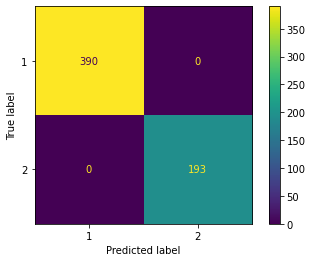

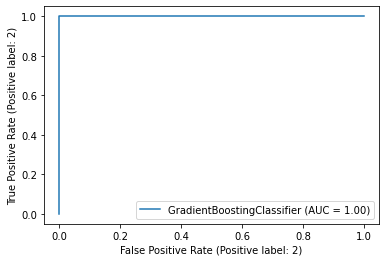

In [286]:
print(accuracy_score(y_test,y_pred))
print(balanced_accuracy_score(y_test,y_pred))
print(f1_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
plot_confusion_matrix(model,X_test,y_test)
print(cohen_kappa_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test, y_pred_proba[:,1]))
plot_roc_curve(model,X_test,y_test)

In [287]:
# Cross Validation as a better process over train-test split
from sklearn.model_selection import cross_val_score
scores_accuracy = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
scores_balanced_accuracy = cross_val_score(model, X_train, y_train, cv=10, scoring='balanced_accuracy')
scores_auc = cross_val_score(model, X_train, y_train, cv=10, scoring='roc_auc')
scores_accuracy.mean(),scores_balanced_accuracy.mean(), scores_auc.mean()

(1.0, 1.0, 1.0)

In [288]:
scores_accuracy,scores_balanced_accuracy,scores_auc

(array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]))

In [170]:
# Hyper parameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
param_grid = {'max_depth':['None',2,3,4,5],
              'max_features':['auto',2,3,5,8],
              'min_samples_split':[2,3,5,8],
              'n_estimators': [25,50,100,200,400],
               'learning_rate': [0.01,0.05,0.1,0.2,0.5]
              }

In [171]:
# Initiate your model
model = GradientBoostingClassifier()
# Get a list of all possible parameters

grid_search_acc = GridSearchCV(estimator = model,  
                           param_grid = param_grid,
                           scoring = 'accuracy',
                           cv = 10,
                           verbose=0)
grid_search_Bal_acc = GridSearchCV(estimator = model,  
                           param_grid = param_grid,
                           scoring = 'balanced_accuracy',
                           cv = 10,
                           verbose=0)
grid_search_auc = GridSearchCV(estimator = model,  
                           param_grid = param_grid,
                           scoring = 'roc_auc',
                           cv = 10,
                           verbose=0)
grid_search_acc.fit(X_train, y_train)
grid_search_Bal_acc.fit(X_train, y_train)
grid_search_auc.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.5],
                         'max_depth': ['None', 2, 3, 4, 5],
                         'max_features': ['auto', 2, 3, 5, 8],
                         'min_samples_split': [2, 3, 5, 8],
                         'n_estimators': [25, 50, 100, 200, 400]},
             scoring='roc_auc')

In [172]:
print(grid_search_acc.best_params_)
print(grid_search_Bal_acc.best_params_)
print(grid_search_auc.best_params_)

{'learning_rate': 0.05, 'max_depth': 5, 'max_features': 3, 'min_samples_split': 8, 'n_estimators': 200}
{'learning_rate': 0.05, 'max_depth': 5, 'max_features': 2, 'min_samples_split': 8, 'n_estimators': 100}
{'learning_rate': 0.05, 'max_depth': 4, 'max_features': 2, 'min_samples_split': 3, 'n_estimators': 50}


In [173]:
y_pred = grid_search_acc.predict(X_test)

In [174]:
grid_search_acc

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.5],
                         'max_depth': ['None', 2, 3, 4, 5],
                         'max_features': ['auto', 2, 3, 5, 8],
                         'min_samples_split': [2, 3, 5, 8],
                         'n_estimators': [25, 50, 100, 200, 400]},
             scoring='accuracy')

In [175]:
print(accuracy_score(y_test,y_pred))
print(balanced_accuracy_score(y_test,y_pred))
print(f1_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))
print(cohen_kappa_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test, y_pred_proba[:,1]))

0.855072463768116
0.8546520927752599
0.869281045751634
0.8807947019867549
0.8580645161290322
[[103  18]
 [ 22 133]]
0.7067417521117781
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       121
           1       0.88      0.86      0.87       155

    accuracy                           0.86       276
   macro avg       0.85      0.85      0.85       276
weighted avg       0.86      0.86      0.86       276

0.9301519594774726


In [ ]:
grid_search_acc.best_estimator_.feature_importances_

In [ ]:
feat_import = grid_search_acc.best_estimator_.feature_importances_

In [ ]:
imp_feats = pd.DataFrame(index=X.columns,data=feat_import,columns=['Importance'])
imp_feats

In [ ]:
imp_feats.sort_values("Importance",ascending=False)

In [ ]:
imp_feats.describe().transpose()

In [ ]:
imp_feats = imp_feats[imp_feats['Importance'] > 0.0005]

In [ ]:
imp_feats.sort_values('Importance')

In [ ]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_feats.sort_values('Importance'),x=imp_feats.sort_values('Importance').index,y='Importance')
plt.xticks(rotation=90);

In [ ]:
pip install xgboost

## XGBOOST

In [ ]:
from xgboost import XGBClassifier

In [ ]:
model = XGBClassifier(use_label_encoder=False, 
                      booster='gbtree', # boosting algorithm to use, default gbtree, othera: gblinear, dart
                      n_estimators=100, # number of trees, default = 100
                      eta=0.3, # this is learning rate, default = 0.3
                      max_depth=6, # maximum depth of the tree, default = 6
                      gamma = 0, # used for pruning, if gain < gamma the branch will be pruned, default = 0
                      reg_lambda = 1, # regularization parameter, defautl = 1
                      #min_child_weight=0 # this refers to Cover which is also responsible for pruning if not set to 0
                     )


In [ ]:
clf = model.fit(X_train, y_train)

In [ ]:
# Predict class labels on training data
pred_labels_tr = model.predict(X_train)
# Predict class labels on a test data
pred_labels_te = model.predict(X_test)

In [ ]:
score_te = model.score(X_test, y_test)
score_te

In [ ]:
score_tr = model.score(X_train, y_train)
score_tr

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
param_grid = {'eta':[0,0.2,0.4,0.6,0.8,1],'gamma':[0,1,2,4,8,16],"n_estimators":[1,5,10,20,40,100],'min_child_weight':[0,1,2,4,8,16],'max_depth':range(2,10),'subsample':[0,0.2,0.4,0.6,0.8,1]}


In [ ]:
grid = RandomizedSearchCV(model,param_distributions=param_grid,scoring = 'accuracy',n_iter = 50)
grid.fit(X_train,y_train)
grid.best_params_


In [ ]:
y_pred = grid.predict(X_test)
[round(accuracy_score(y_test,y_pred),3),round(cohen_kappa_score(y_test,y_pred),3),round(roc_auc_score(y_test,y_pred),3)]


## Naive bayes

In [ ]:
from sklearn.naive_bayes import BernoulliNB
classifier = BernoulliNB()
classifier.fit(X_train, y_train)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
plot_confusion_matrix(classifier,X_test,y_test)

In [ ]:
accuracy_score(y_test, y_pred)

In [ ]:
param_grid = {'alpha':[0,0.25,0.5,0.75,1]}

In [ ]:
grid = GridSearchCV(classifier,param_grid=param_grid)
grid.fit(X_train,y_train)
grid.best_params_

In [ ]:
y_pred = grid.predict(X_test)
[round(accuracy_score(y_test,y_pred),3),round(cohen_kappa_score(y_test,y_pred),3),round(roc_auc_score(y_test,y_pred),3)]


In [ ]:
plot_confusion_matrix(classifier,X_test,y_test)

In [ ]:
from sklearn.linear_model import Perceptron

In [ ]:
model = Perceptron()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
plot_confusion_matrix(perceptron,X_test,y_test)

In [ ]:
param_grid = {'penalty':['l2','l1','elasticnet'],
             'alpha':[0.001,0.01,0.1,1,10,100],
              'l1_ratio':[0.05,0.15,0.25,0.5,0.75,0.85,0.95]}


In [ ]:
grid = GridSearchCV(model,param_grid=param_grid)
grid.fit(X_train,y_train)
grid.best_params_

In [ ]:
y_pred = grid.predict(X_test)
[round(accuracy_score(y_test,y_pred),3),round(cohen_kappa_score(y_test,y_pred),3),round(roc_auc_score(y_test,y_pred),3)]


In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
model = MLPClassifier()
model.fit(X_train, y_train)
y_pred = perceptron.predict(X_test)

In [ ]:
plot_confusion_matrix(model,X_test,y_test)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


In [ ]:
param_grid = {'activation':['identity','logistic','tanh','relu'],
             'learning_rate':['constant','invscaling','adaptive'],
              'learning_rate_init':[0.001, 0.005, 0.01],
              'shuffle':[True, False]}

In [ ]:
grid = GridSearchCV(model,param_grid=param_grid)
grid.fit(X_train,y_train)
grid.best_params_

In [ ]:
y_pred = grid.predict(X_test)
[round(accuracy_score(y_test,y_pred),3),round(cohen_kappa_score(y_test,y_pred),3),round(roc_auc_score(y_test,y_pred),3)]


# Implementing an end-end project using Pipeline

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import  MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [ ]:
def GetBasedModel():
    basedModels = []
    basedModels.append(('LR'   , LogisticRegression()))
    basedModels.append(('LDA'  , LinearDiscriminantAnalysis()))
    basedModels.append(('KNN'  , KNeighborsClassifier()))
    basedModels.append(('CART' , DecisionTreeClassifier()))
    basedModels.append(('NB'   , GaussianNB()))
    basedModels.append(('SVM'  , SVC(probability=True)))
    basedModels.append(('AB'   , AdaBoostClassifier()))
    basedModels.append(('GBM'  , GradientBoostingClassifier()))
    basedModels.append(('RF'   , RandomForestClassifier()))
    basedModels.append(('NN'   , MLPClassifier()))
    
    return basedModels


In [ ]:
def BasedLine2(X_train, y_train,models):
    # Test options and evaluation metric
    num_folds = 10
    scoring = 'accuracy'

    results = []
    names = []
    for name, model in models:
        kfold = StratifiedKFold(n_splits=num_folds)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
    return names, results

In [ ]:
models = GetBasedModel()
names,results = BasedLine2(X_train, y_train,models)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


def GetScaledModel(nameOfScaler):
    
    if nameOfScaler == 'standard':
        scaler = StandardScaler()
    elif nameOfScaler =='minmax':
        scaler = MinMaxScaler()

    pipelines = []
    pipelines.append((nameOfScaler+'LR'  , Pipeline([('Scaler', scaler),('LR'  , LogisticRegression())])))
    pipelines.append((nameOfScaler+'LDA' , Pipeline([('Scaler', scaler),('LDA' , LinearDiscriminantAnalysis())])))
    pipelines.append((nameOfScaler+'KNN' , Pipeline([('Scaler', scaler),('KNN' , KNeighborsClassifier())])))
    pipelines.append((nameOfScaler+'CART', Pipeline([('Scaler', scaler),('CART', DecisionTreeClassifier())])))
    pipelines.append((nameOfScaler+'NB'  , Pipeline([('Scaler', scaler),('NB'  , GaussianNB())])))
    pipelines.append((nameOfScaler+'SVM' , Pipeline([('Scaler', scaler),('SVM' , SVC())])))
    pipelines.append((nameOfScaler+'AB'  , Pipeline([('Scaler', scaler),('AB'  , AdaBoostClassifier())])  ))
    pipelines.append((nameOfScaler+'GBM' , Pipeline([('Scaler', scaler),('GMB' , GradientBoostingClassifier())])  ))
    pipelines.append((nameOfScaler+'RF'  , Pipeline([('Scaler', scaler),('RF'  , RandomForestClassifier())])  ))
    pipelines.append((nameOfScaler+'NN'  , Pipeline([('Scaler', scaler),('NN'  , MLPClassifier())])  ))


    return pipelines 

In [ ]:
models = GetScaledModel('minmax')
names,results = BasedLine2(X_train, y_train,models)
